## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

* 분석을 통해 가설을 검증하자. 

## 3. 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 4. 한글폰트 설정

In [2]:
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
#마이너스 폰트 문제 대처
plt.rc("axes",unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

## 5. 데이터 불러오기

* 링크 : https://www.data.go.kr/data/15007122/fileData.do
* 2017년도 건강검진 정보

In [3]:
# pandas로 로드
df = pd.read_csv("data/NHIS_OPEN_GJ_2017_v1.1.csv", encoding="cp949")
df.shape

(1000000, 34)

### 5.1 데이터 미리보기

In [4]:
# sample, head, tail 사용
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


## 6. 기본정보보기

In [5]:
#info를 통해 데이터 크기, 형식, 메모리 사용량을 볼 수 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [6]:
#컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [7]:
#dtypes를 통해 데이터 형식만 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

## 7. 결측치 보기

In [8]:
# isnull을 통해 결측치를 bool값으로 표시, sum을하면 컬럼마다 결측치 수 카운트
df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [9]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [10]:
# isna로도 결측지 여부 확인 가능
df.isna()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


<AxesSubplot:>

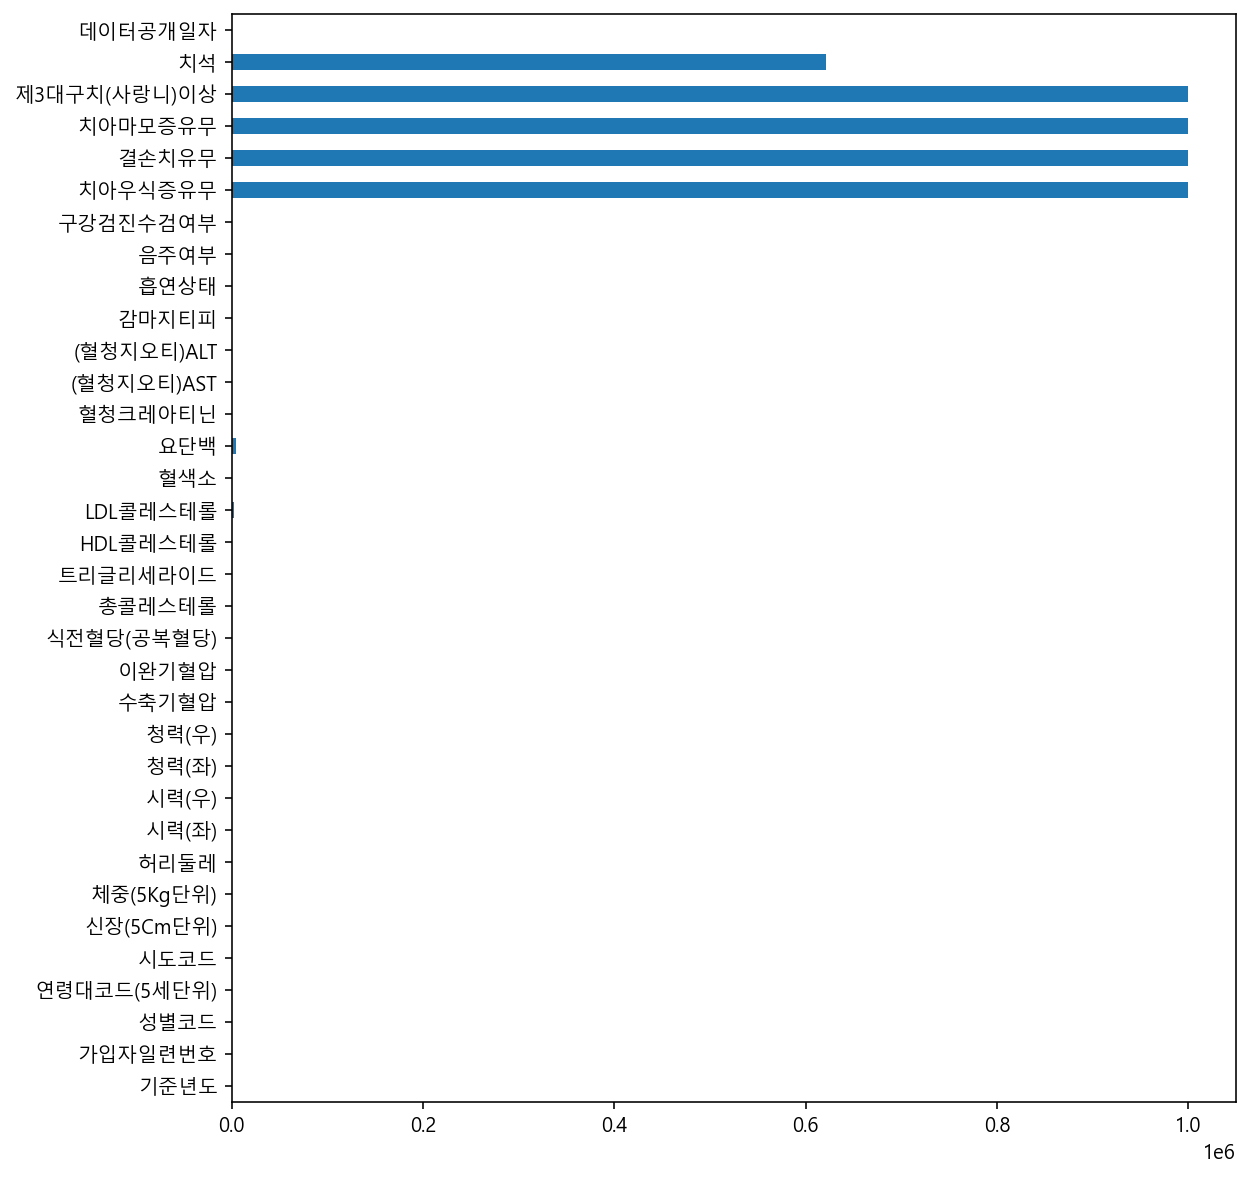

In [11]:
#polt을 통해 결측치 시각화 
df.isnull().sum().plot.barh(figsize=(9,10))

## 8. 일부 데이터 요약하기

In [12]:
# 여러 컬럼 가져오기
# 한 컬럼만 가져오면, 시리즈 형태
df[["(혈청지오티)ALT","(혈청지오티)AST"]]#list형태 반환

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0
...,...,...
999995,36.0,26.0
999996,17.0,14.0
999997,27.0,30.0
999998,14.0,21.0


In [13]:
# 요약하기 describe, info 이용
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


## 9. value_counts로 값 집계하기

In [14]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [15]:
# value_counts 를 통해 흡연상태를 그룹화 하고 갯수를 집계
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

## 10. groupby와 pivot 사용하기 
### 10.1 groupby

In [16]:
# 성별코드로 그룹화 한데이터를 세어보기
df.groupby(["성별코드"]).mean()

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2017.0,499656.610053,10.308458,34.098773,168.537858,70.120963,85.079026,1.036886,1.035752,1.032173,...,1.102797,0.973770,28.060949,30.635680,49.445130,2.062924,NaN,NaN,NaN,NaN
2,2017.0,500388.929624,10.773935,33.238046,155.101397,55.528972,76.883707,0.916758,0.912829,1.031174,...,1.084932,0.736112,23.660739,20.230379,23.335241,1.093455,NaN,NaN,NaN,NaN


In [17]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [18]:
#성별코드와 음주여부로 그룹화를 하고 갯수 세기
df.groupby(["성별코드","음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [19]:
#성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균 구하기
df.groupby(["성별코드","음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [20]:
#성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치 구하기
df.groupby(["성별코드","음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [21]:
# agg을 사용하면 여러 수치를 함께 구할 수 있음
df.groupby(["성별코드","음주여부"])["감마지티피"].agg(["count","mean","median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

### 10.2 pivot table

In [22]:
#음주 여부에 따른 그룹화된 수를 피봇테이블로 구하기 => 직관적 사용, 실행 느림
df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

,가입자일련번호
성별코드,
1,530410
2,469590


In [23]:
#음주 여부에 따른 감마지티피의 평균 구하기
pd.pivot_table(df, index="음주여부",values="감마지티피")

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [24]:
#기본값은 평균을 구하지만, aggfunc을 통해 지정가능
pd.pivot_table(df, index="음주여부",values="감마지티피",aggfunc='mean')

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [25]:
#aggfunc 에 여러개를 한번에 지정 가능
pd.pivot_table(df, index="음주여부",values="감마지티피", aggfunc=["mean","median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
N,26.819650,19.0
Y,47.588675,30.0


In [26]:
#describe를 사용해 통계용약값을 한번에 볼 수 있음
pd.pivot_table(df, index="음주여부",values="감마지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
N,14.0,19.0,29.0,500417.0,999.0,26.819650,1.0,30.639714
Y,18.0,30.0,52.0,499005.0,999.0,47.588675,1.0,63.056912


In [27]:
#성별코드, 음주 여부에 따른 describe
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
N    1     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     2     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
Y    1     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
     2     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

## 11. 전체 데이터 시각화하기
* 100만개 넘는 데이터 : groupby, pivot_table 연산하고 시각화하기
* 100만개 넘는 데이터를 seaborn 이용하면 느릴수 있음

### 11.1 히스토그램
* 판다스 info기능을 통해 대부분 수치 데이터로 이루어진것을 확인 가능
* 히스토그램을 사용하면 bin의 개수만큼 그룹화해서 도수분표표만들고, 그결과 시각화
* 데이터는 수치데이터가 많기때문에 판다스의 hist를 사용해서 히스토그램 그리기

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>,
        <AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>],
       [<AxesSubplot:title={'center':'신장(5Cm단위)'}>,
        <AxesSubplot:title={'center':'체중(5Kg단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>,
        <AxesSubplot:title={'center':'시력(우)'}>],
       [<AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>,
        <AxesSubplot:title={'center':'수축기혈압'}>,
        <AxesSubplot:title={'center':'이완기혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>],
       [<AxesSubplot:title={'center':'총콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'LDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>],
       [<Ax

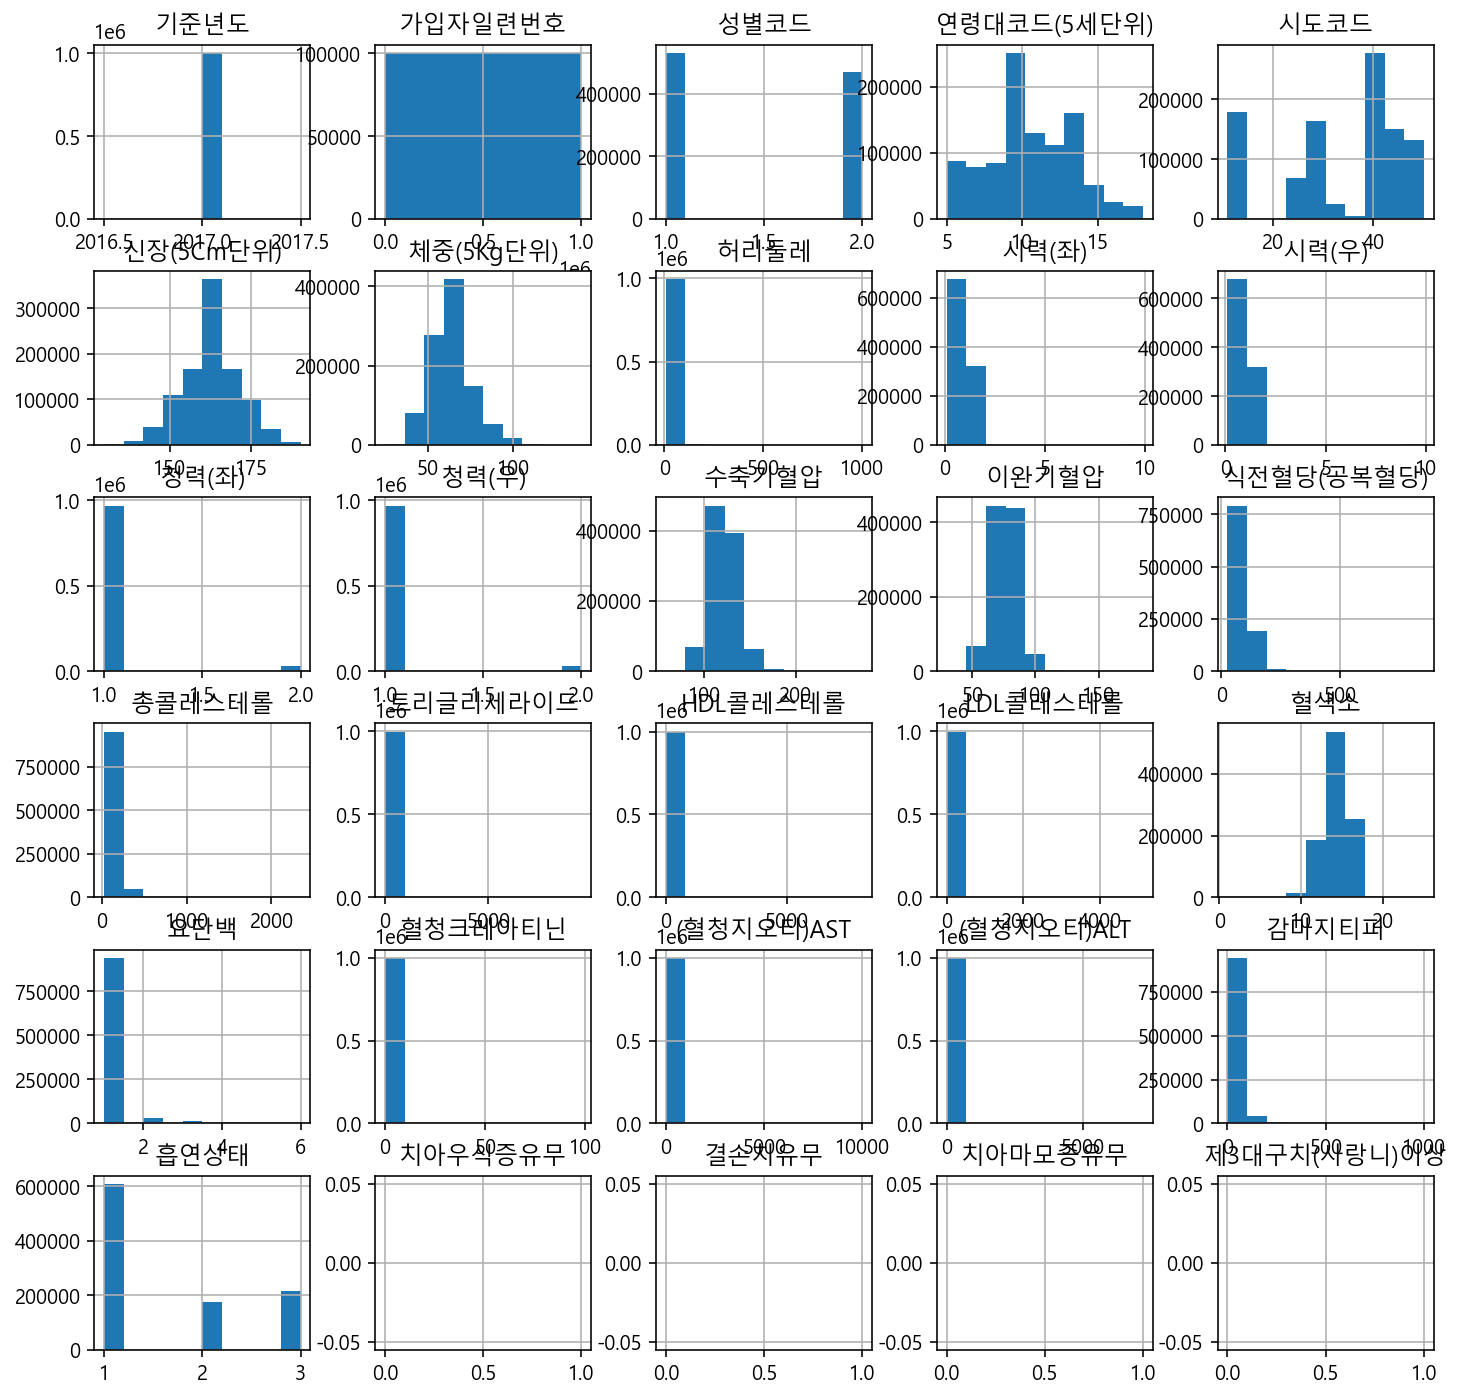

In [28]:
#전체 데이터에 대한 히스토그램 출력
df.hist(figsize=(12, 12))

### 11.2 슬리아싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해서 데이터 나누기
* 슬라이싱 사용시 iloc을 활용하면 인덱스의 순서대로 슬라이싱
* iloc[행,열]순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할때는[:,:]사용
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자 써주면, 해당 시작인덱스:끝나는인덱스(+1) 지정가능

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>],
       [<AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>],
       [<AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>]], dtype=object)

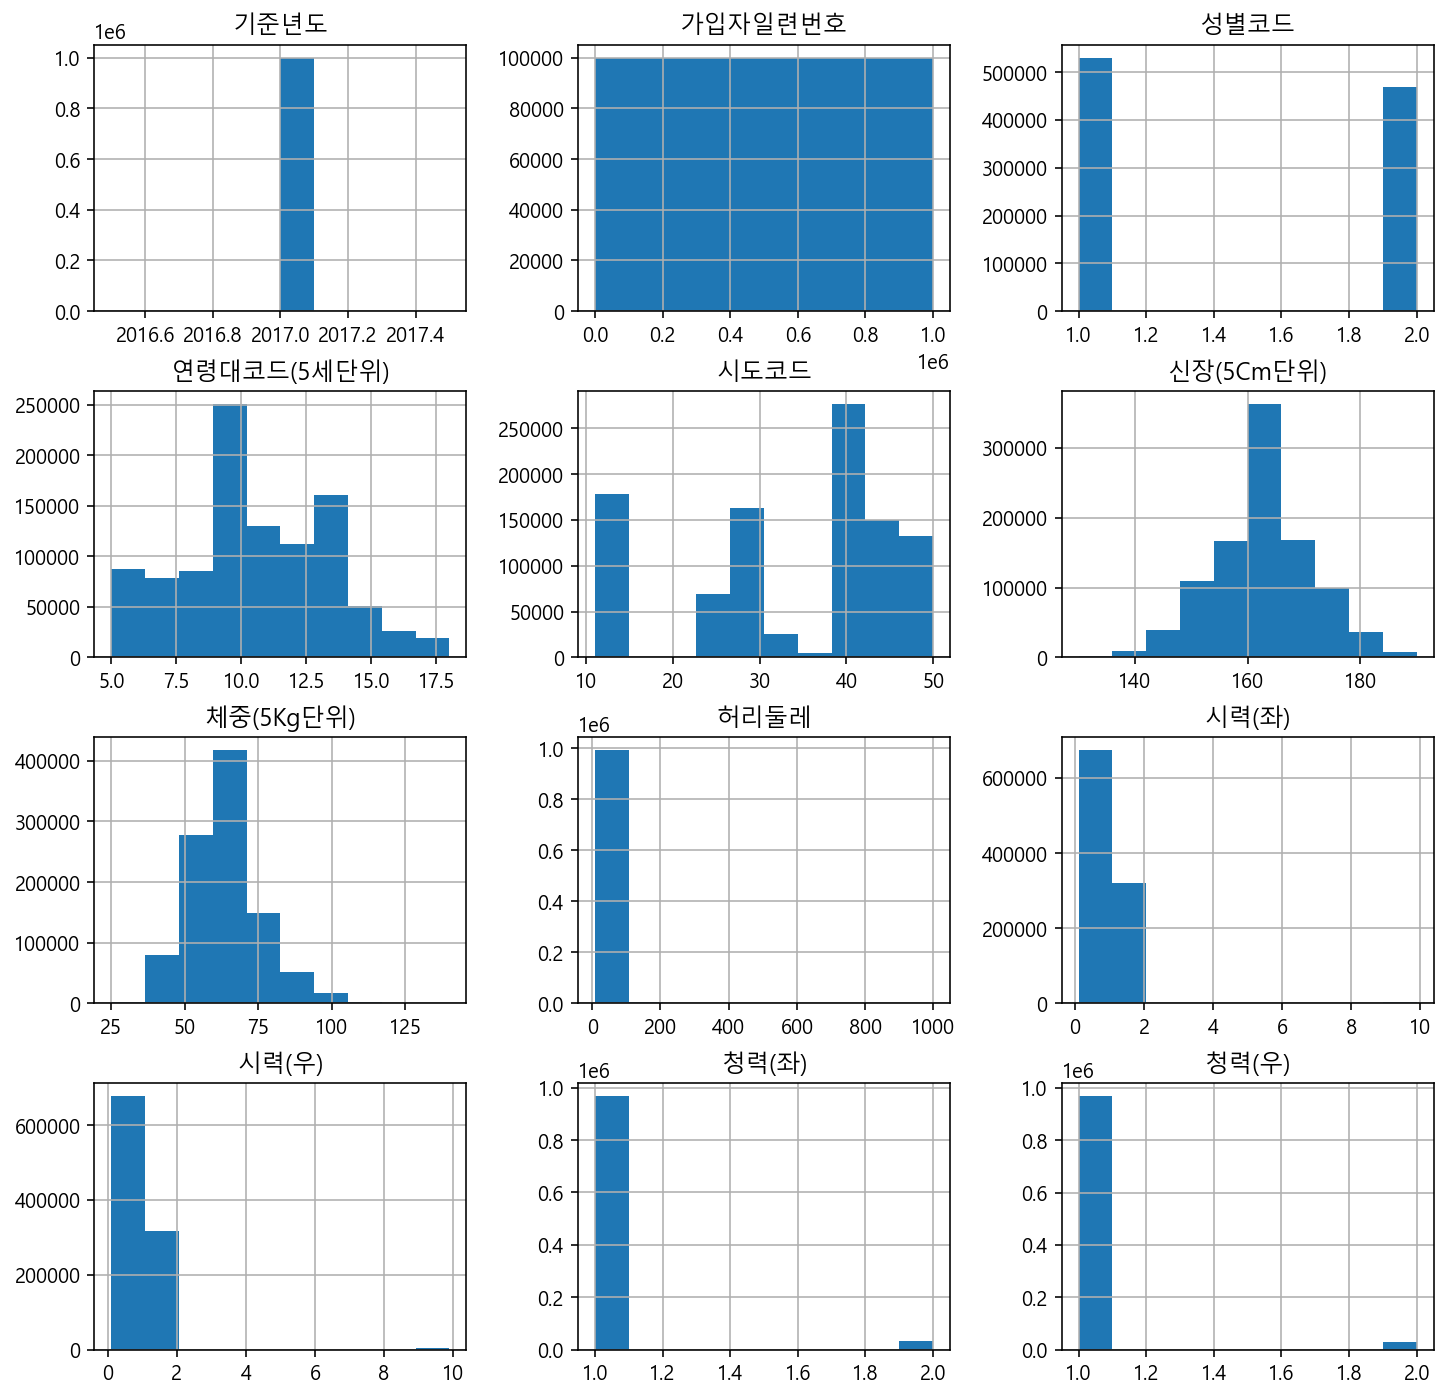

In [29]:
# 슬라이싱을 사용해 12개 컬럼에 대한 데이터로 히스토그램 그리기
df.iloc[:,:12].hist(figsize=(12,12))

array([[<AxesSubplot:title={'center':'수축기혈압'}>,
        <AxesSubplot:title={'center':'이완기혈압'}>,
        <AxesSubplot:title={'center':'식전혈당(공복혈당)'}>],
       [<AxesSubplot:title={'center':'총콜레스테롤'}>,
        <AxesSubplot:title={'center':'트리글리세라이드'}>,
        <AxesSubplot:title={'center':'HDL콜레스테롤'}>],
       [<AxesSubplot:title={'center':'LDL콜레스테롤'}>,
        <AxesSubplot:title={'center':'혈색소'}>,
        <AxesSubplot:title={'center':'요단백'}>],
       [<AxesSubplot:title={'center':'혈청크레아티닌'}>,
        <AxesSubplot:title={'center':'(혈청지오티)AST'}>,
        <AxesSubplot:title={'center':'(혈청지오티)ALT'}>]], dtype=object)

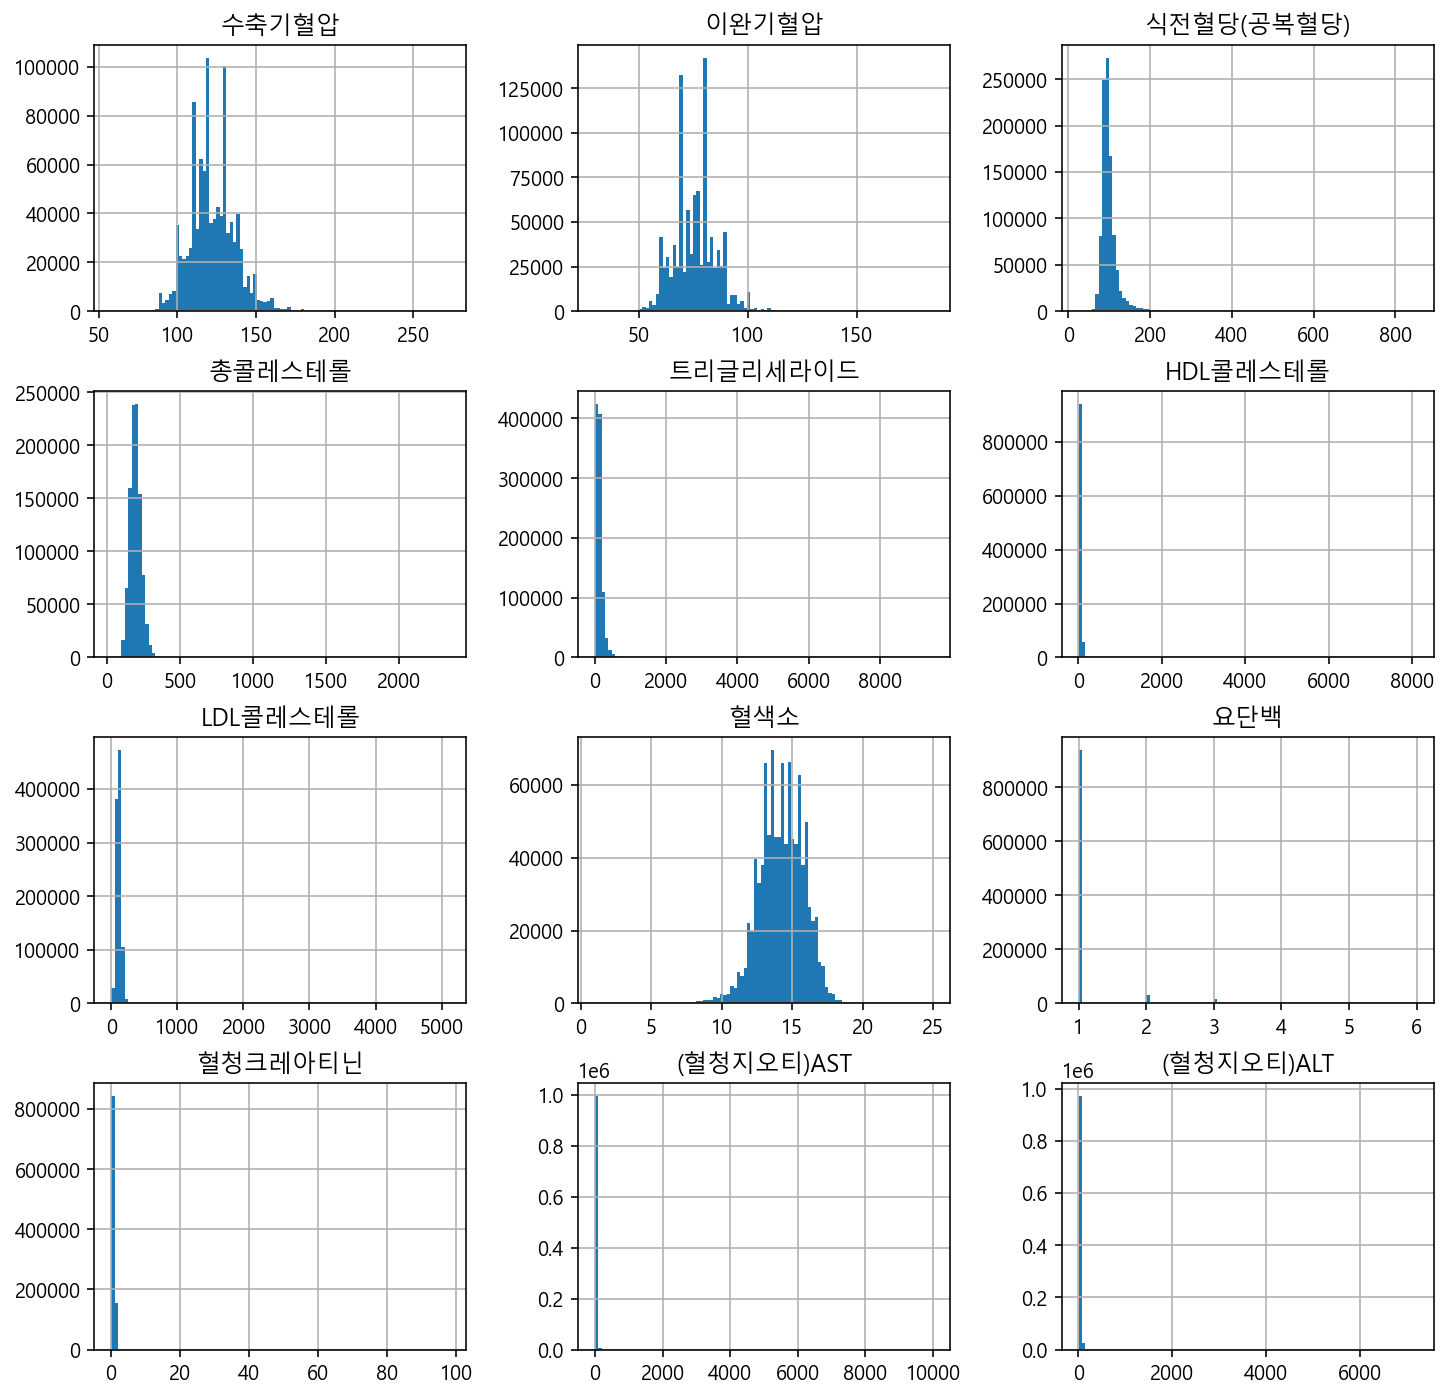

In [30]:
# 슬라이싱을 사용해 12~23번째 컬럼에 대한 히스토그램
df.iloc[:,12:24].hist(figsize=(12,12), bins=100)

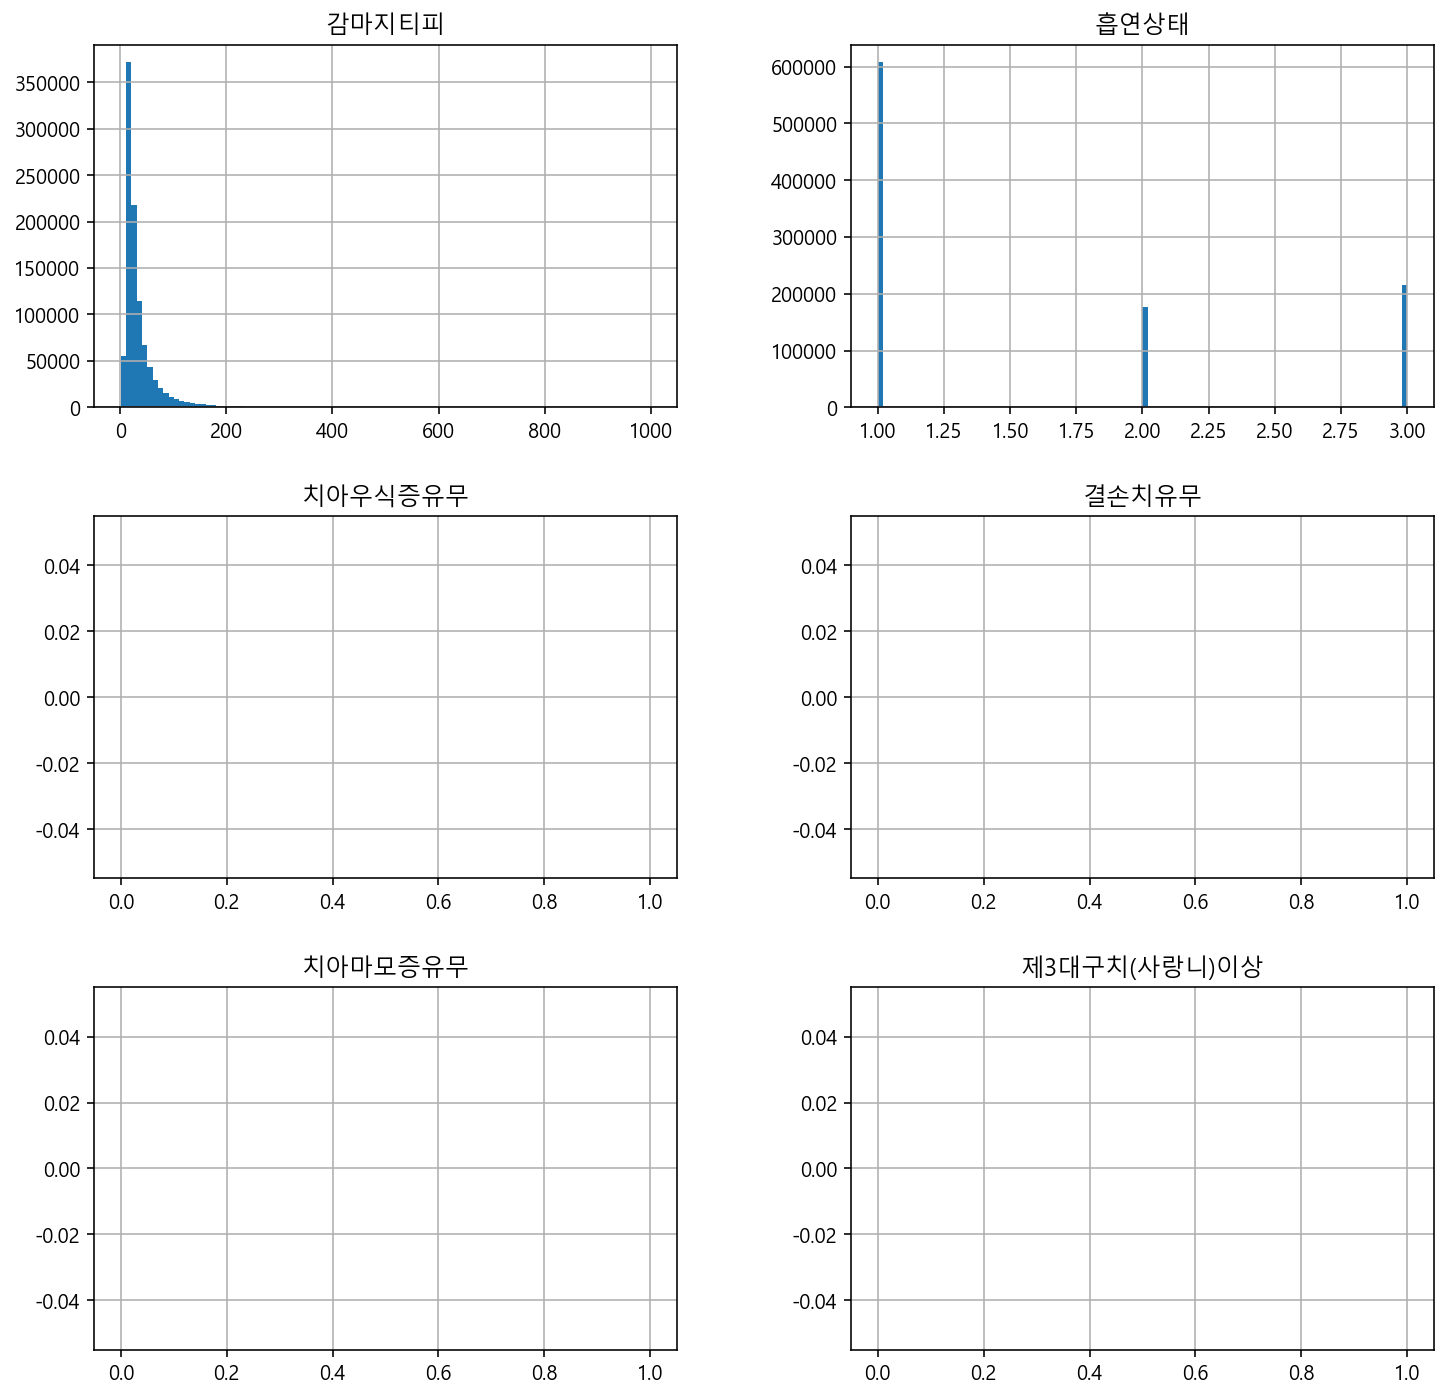

In [31]:
# 슬라이싱을 사용해 24번째 이후 컬럼에 대한 히스토그램
h= df.iloc[:,24:].hist(figsize=(12,12), bins=100)

## 12. 샘플데이터 추출하기

In [32]:
# 일부데이터만 추출하기, random_state통제
df_sample =df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

## 13. 데이터 시각화 도구 seaborn 사용하기

## 14. 범주형(카테고리) 데이터 시각화
### 14.1 countplot - 음주여부

<AxesSubplot:>

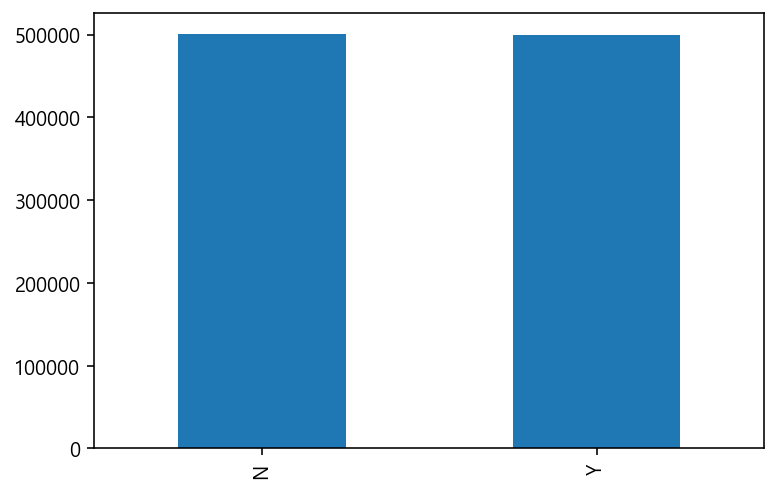

In [33]:
# 음주 여부에 따른 countplot을 그림
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='성별코드', ylabel='count'>

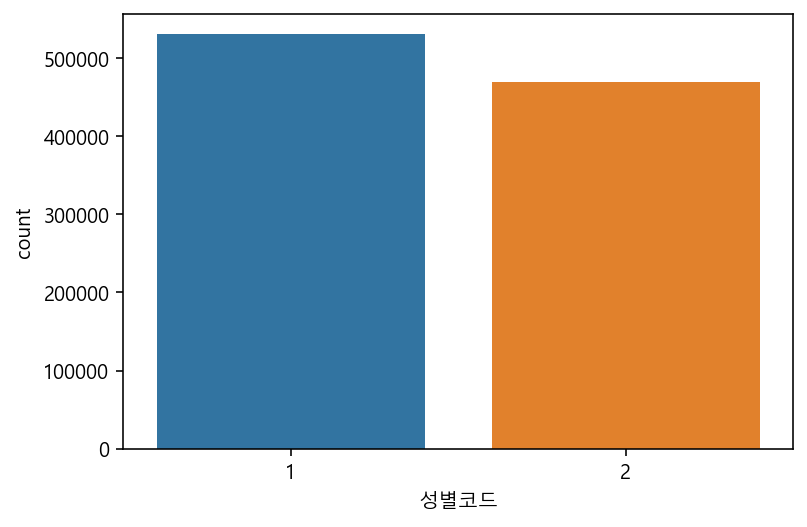

In [34]:
sns.countplot(x="성별코드",data=df)

### 14.2 hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

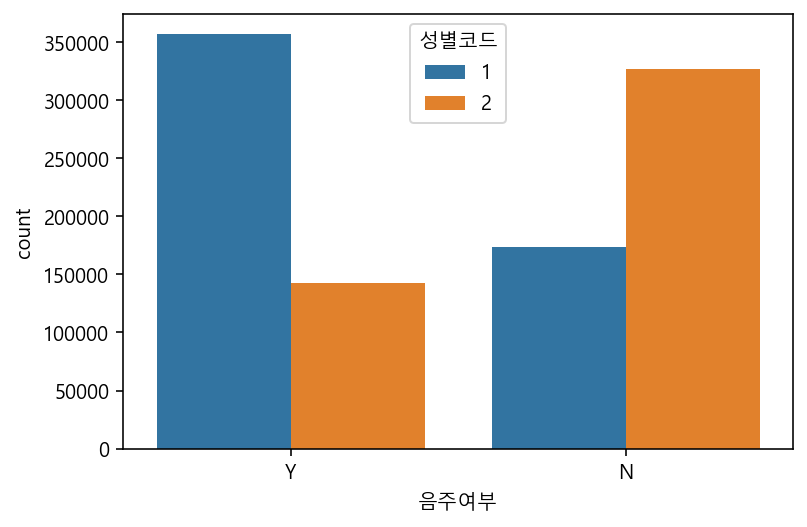

In [35]:
sns.countplot(x="음주여부",data=df, hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

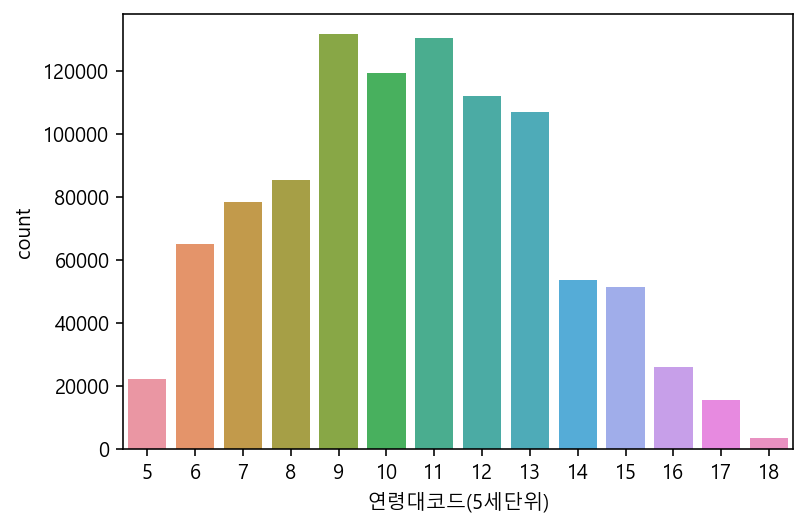

In [36]:
#countplot으로 연령대별 음주여부를 봄
#hue를 사용해 다른 색상으로 표현
sns.countplot(data=df, x="연령대코드(5세단위)")

### 14.3 countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터
* 특정 범위로 묶게 되면, 연속형 보다는 범주형 데이터라고 볼 수 있음

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

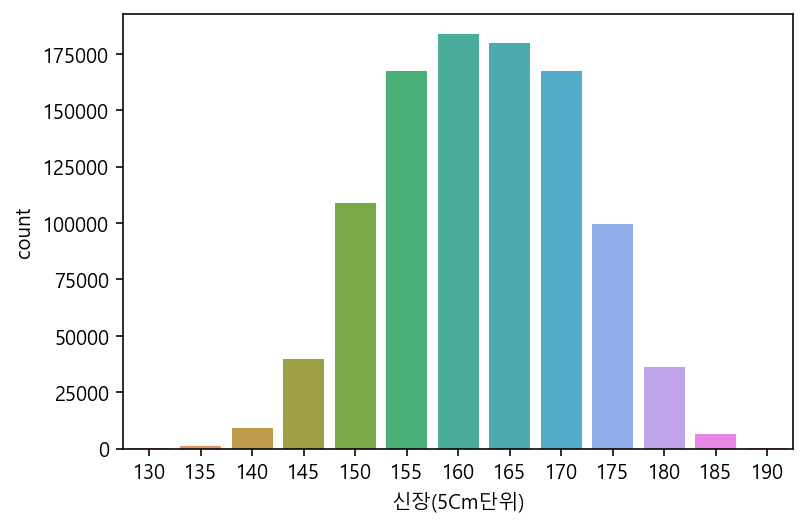

In [37]:
# countplot으로 키를 본다
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

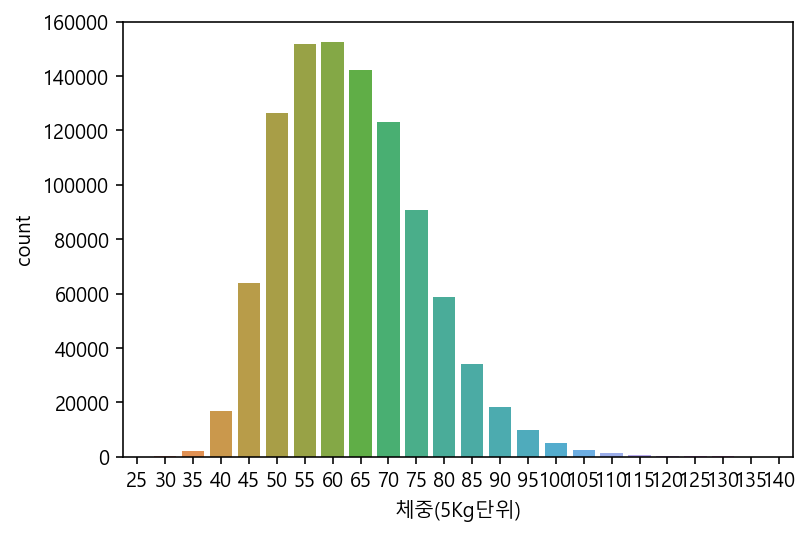

In [38]:
#countplot으로 체중을 본다
sns.countplot(data=df, x="체중(5Kg단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

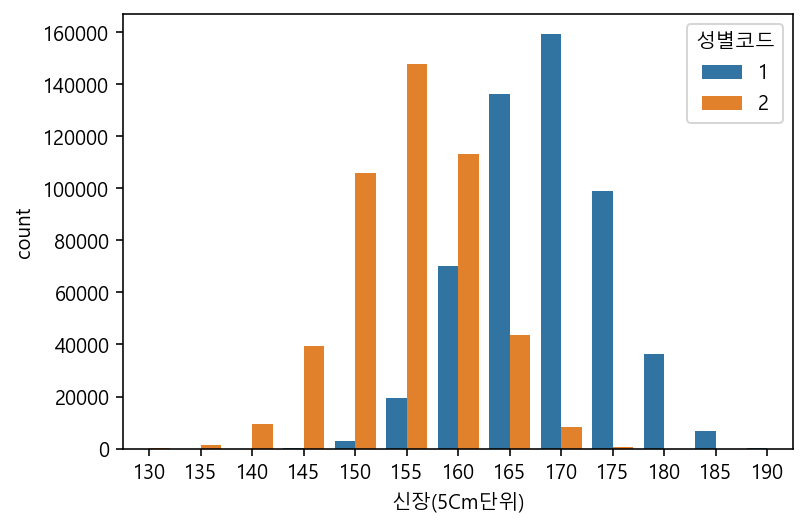

In [39]:
#countplot으로 신장(5Cm단위)을 봄, 성별에 따른 키차이를 봄
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

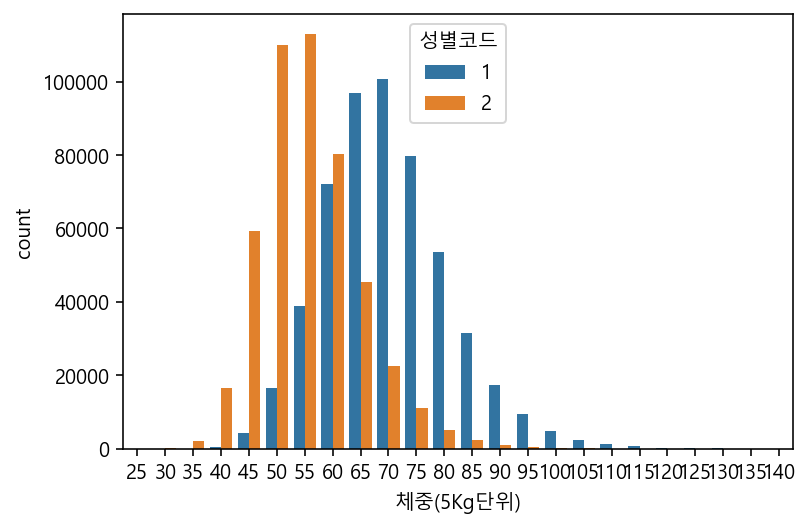

In [40]:
#성별에 따른 체중을 본다
sns.countplot(data=df, x="체중(5Kg단위)",hue="성별코드")

### 14.4 barplot-수치형 vs 범주형 데이터 시각화

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

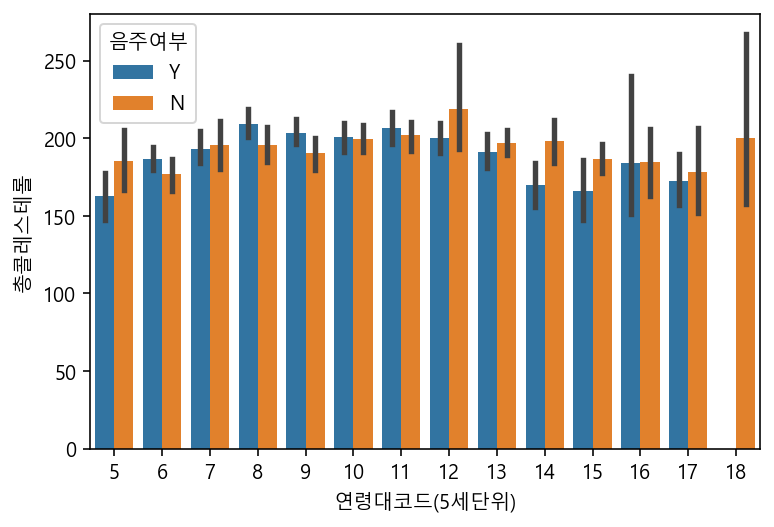

In [41]:
# 연령대코드와 총클레스테롤
# hue로 음주여부를 함께 봄
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="총콜레스테롤",hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

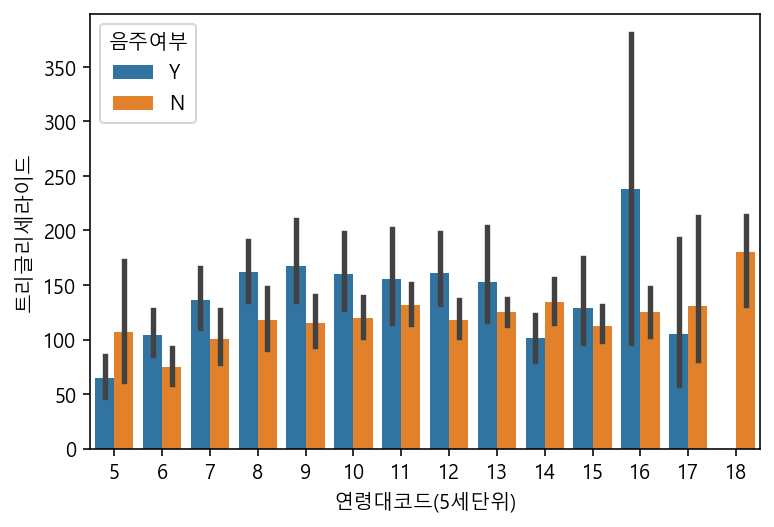

In [42]:
#트리글리세리이드(중성지방) 에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그림
#검은색 줄 -> 신뢰구간을 나타냄
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="트리글리세라이드",hue="음주여부",ci=95)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

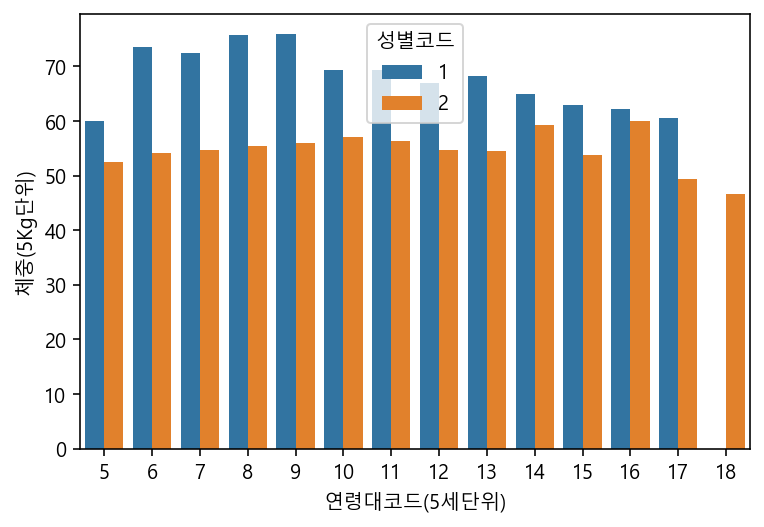

In [43]:
# 연령대코드와 체중을 성별에 따라 봄
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="체중(5Kg단위)",hue="성별코드",ci=None)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

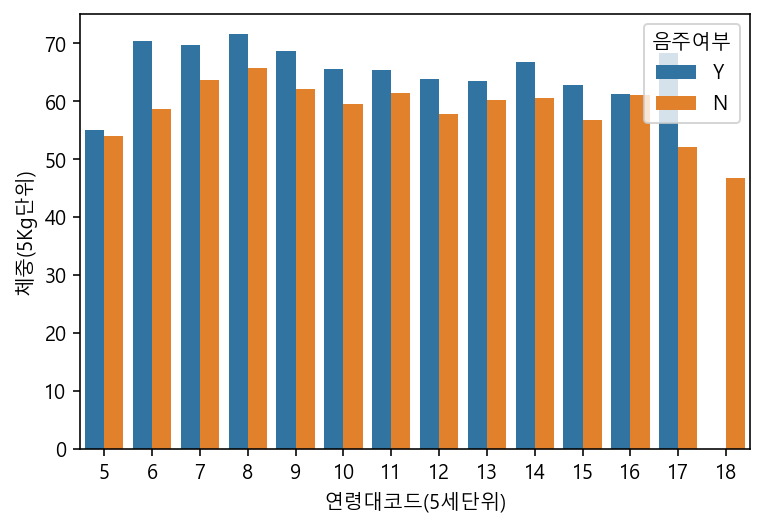

In [44]:
# 연령대코드에따른 체중을 음주여부에 따라 barplot그리기
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="체중(5Kg단위)",hue="음주여부",ci=None)

### 14.5  lineplot and pointplot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

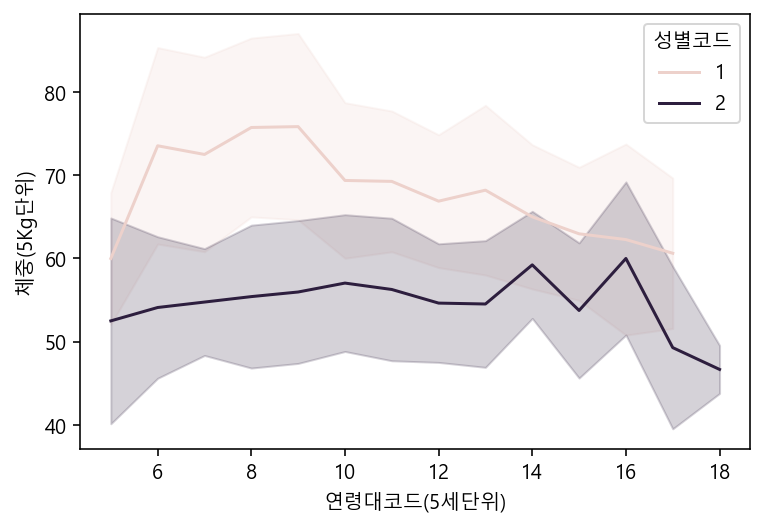

In [45]:
#연령대 코드에 따른 체중을 성별코드에 따라 lineplot으로 그림
sns.lineplot(data=df_sample, x="연령대코드(5세단위)",y="체중(5Kg단위)",hue="성별코드",ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

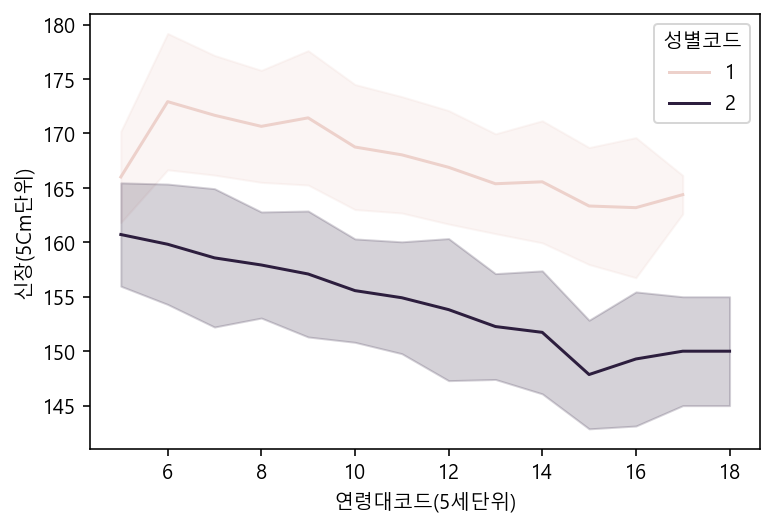

In [46]:
#연령대코드에 다른 신장을 성별코드에 따라 lineplot으로 그리기
sns.lineplot(data=df_sample, x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="성별코드",ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

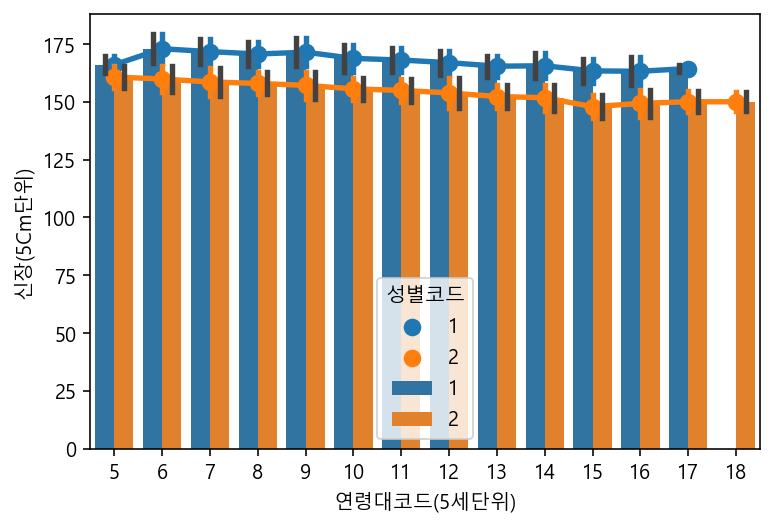

In [47]:
#연령대코드에 따른 체중을 음주여부에 따라 pointplot과 barplot으로 그림
sns.pointplot(data=df_sample, x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="성별코드",ci="sd")
sns.barplot(data=df_sample, x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="성별코드",ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

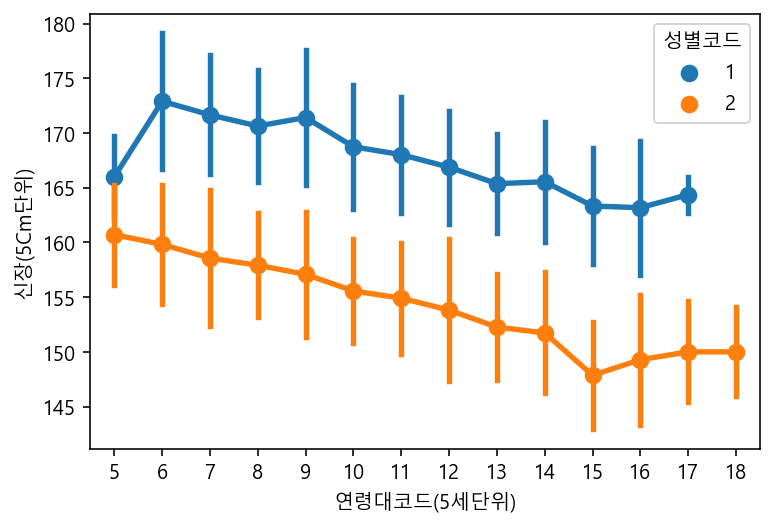

In [48]:
#연령대코드에 따른 신장을 성별코드에 따라 pointplot으로 그림

sns.pointplot(data=df_sample, x="연령대코드(5세단위)",y="신장(5Cm단위)",hue="성별코드",ci="sd")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

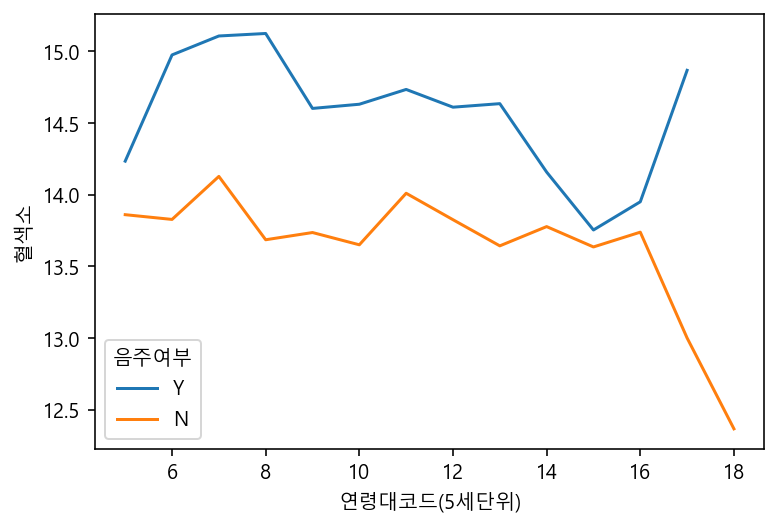

In [49]:
#연령대코드에 따른 신장을 음주여부에 따라 lineplot으로 그림

sns.lineplot(data=df_sample, x="연령대코드(5세단위)",y="혈색소",hue="음주여부",ci=None)

### 14.6 boxplot
* 자료의 정보를 알려주는 다섯가지 수칙

1. 최솟값
2. 제 1사분위수 
3. 제 2사분위수=중앙값
4. 제 3사분위수
5. 최댓값

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

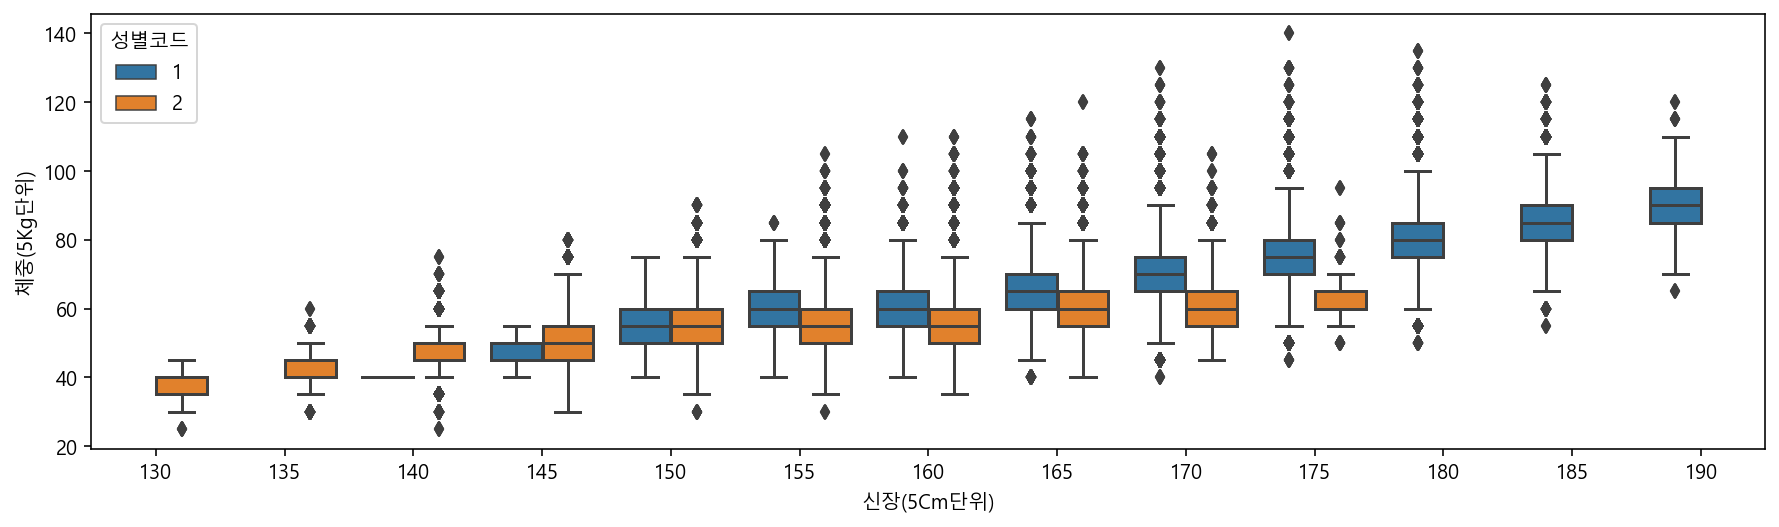

In [50]:
# boxplot으로 신장에 따른 체중을 그리며, 성별코드에 따라 다른 색상으로 표현되게 함
plt.figure(figsize=(15,4))
sns.boxplot(data= df, x="신장(5Cm단위)",y="체중(5Kg단위)",hue="성별코드")

### 14.7 violinpolot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

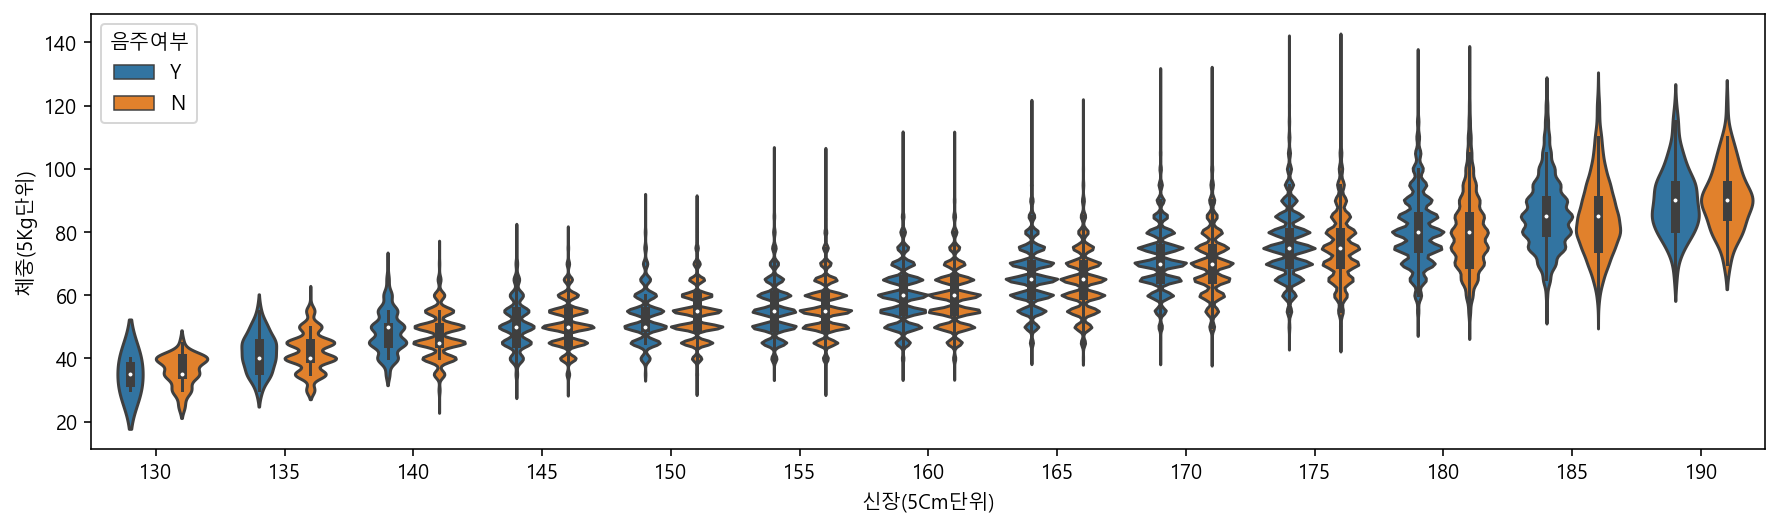

In [51]:
#신장에 따른 체중을 음주여부에 따라 viiolinplot으로 그림
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)",hue="음주여부")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

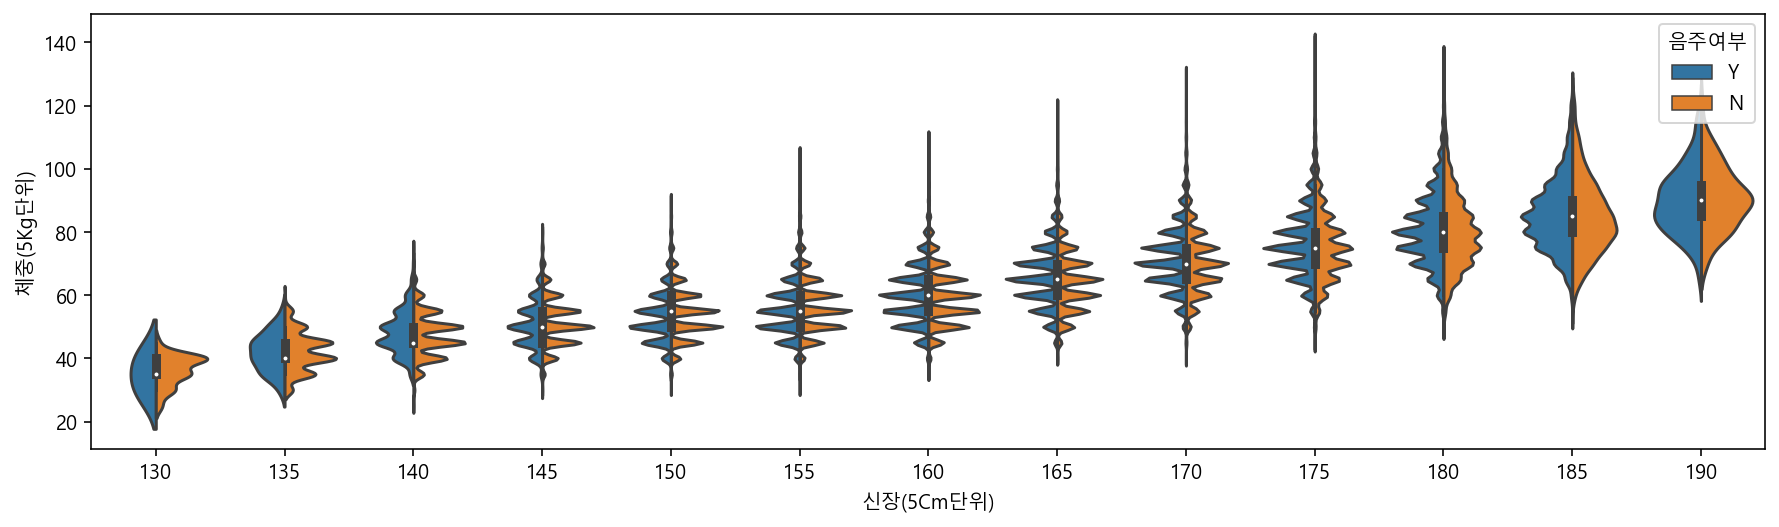

In [52]:
# violinplot의 split 기능 장점. 나눠서 표현 가능
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)",hue="음주여부",split=True)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

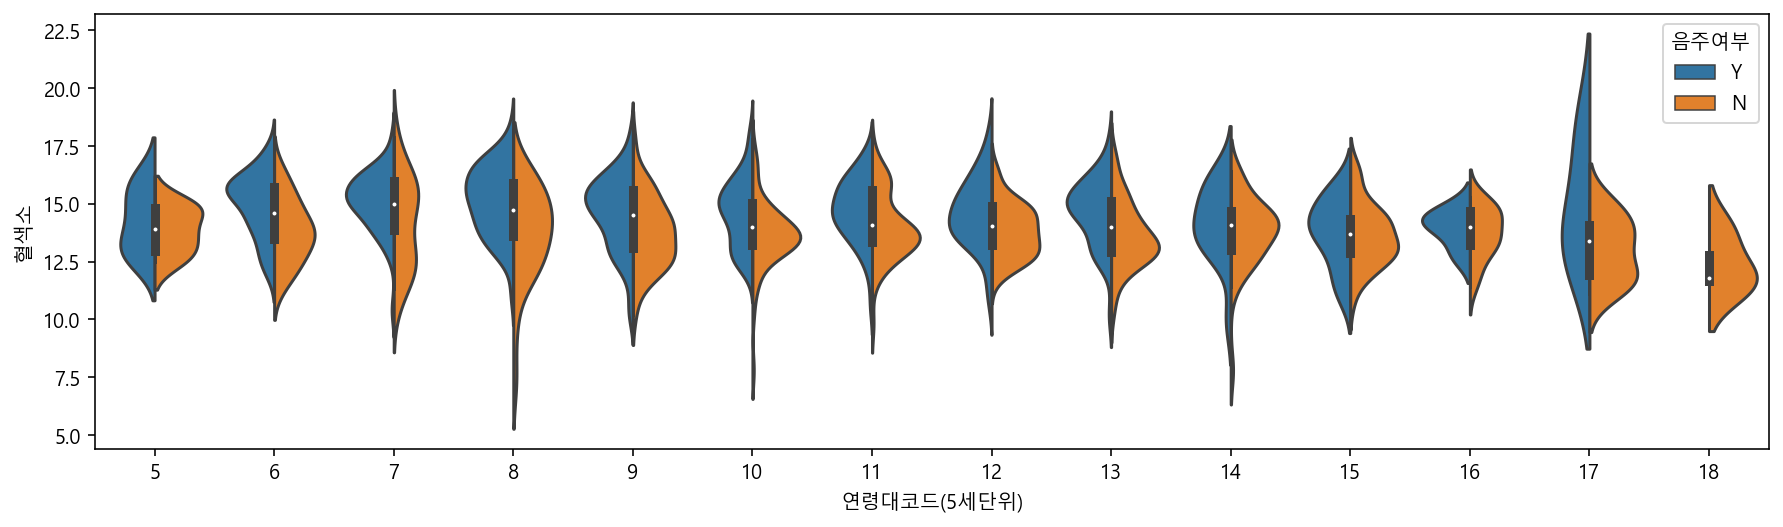

In [53]:
#연령대코드에 따른 혈색소, 음주여부에 따라 viiolinplot으로 그림
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소",hue="음주여부",split=True)

### 14.8 swarm plot

C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.2% of the points cannot be placed; yo

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

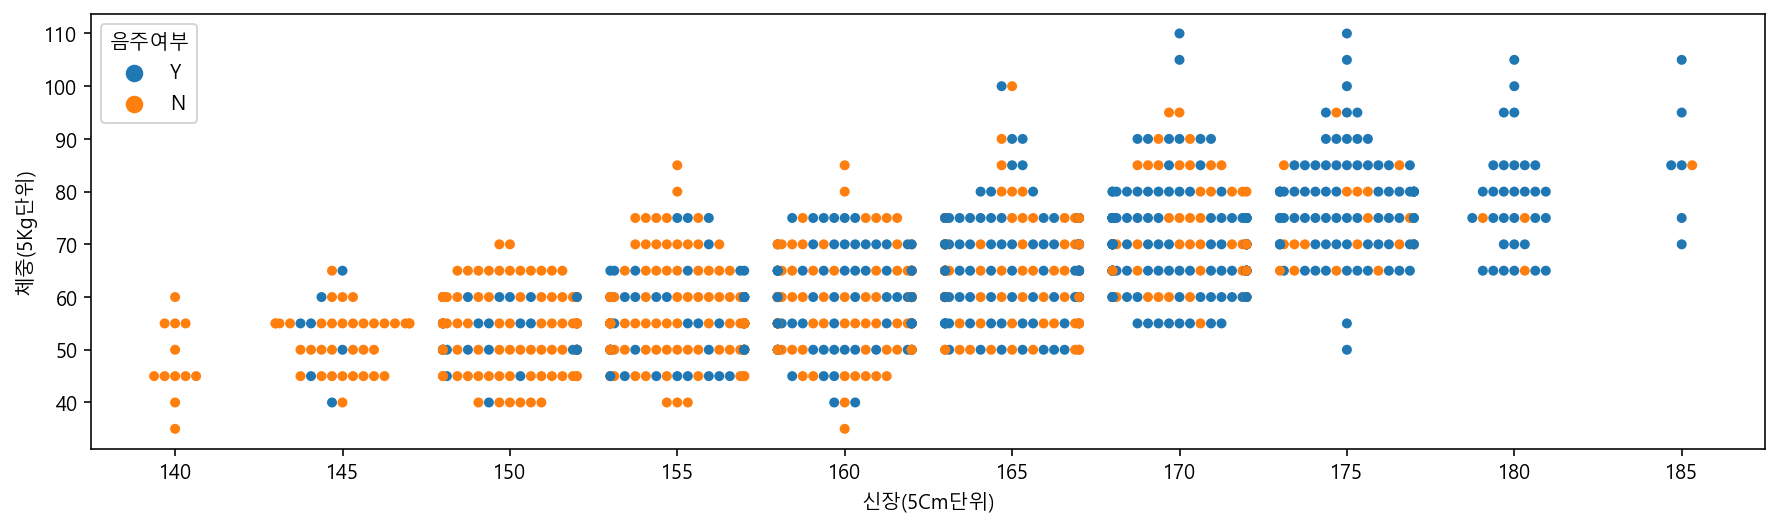

In [54]:
#어느 정도 분포해 있는지 한눈에 보기 쉽다
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x="신장(5Cm단위)", y="체중(5Kg단위)",hue="음주여부")

C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\c\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='혈색소'>

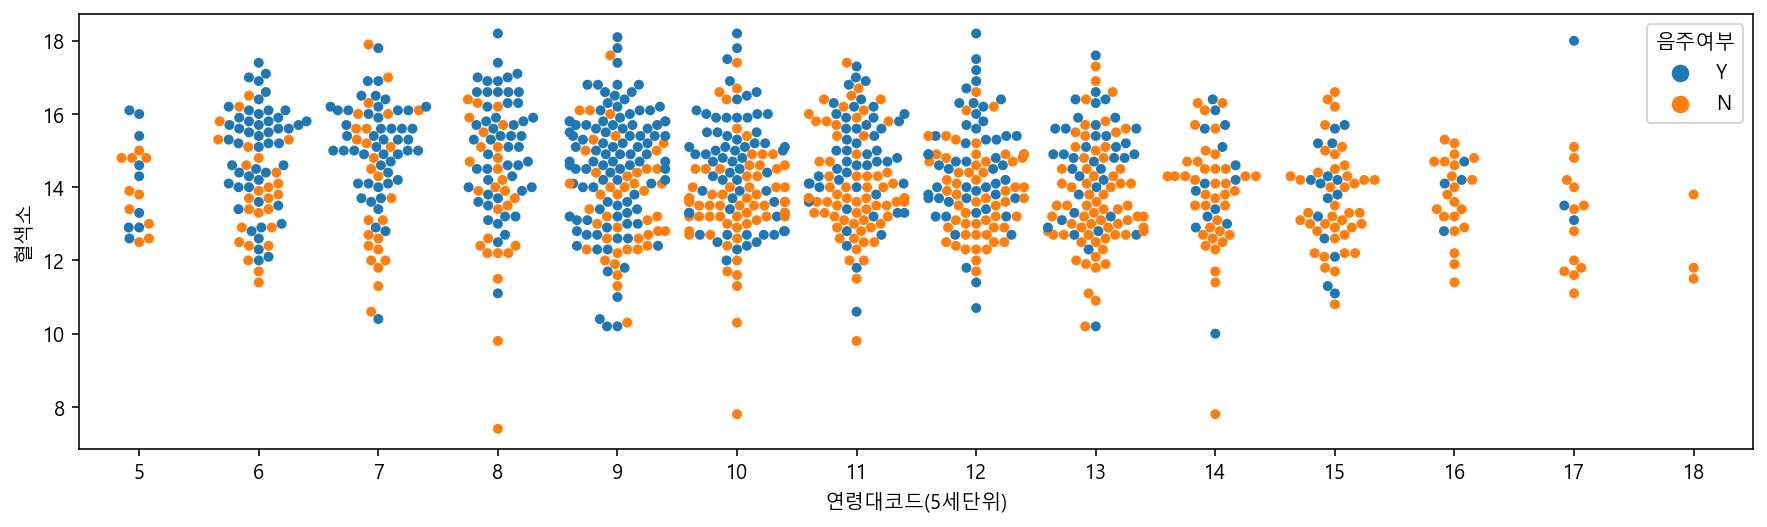

In [55]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample,x="연령대코드(5세단위)", y="혈색소",hue="음주여부")

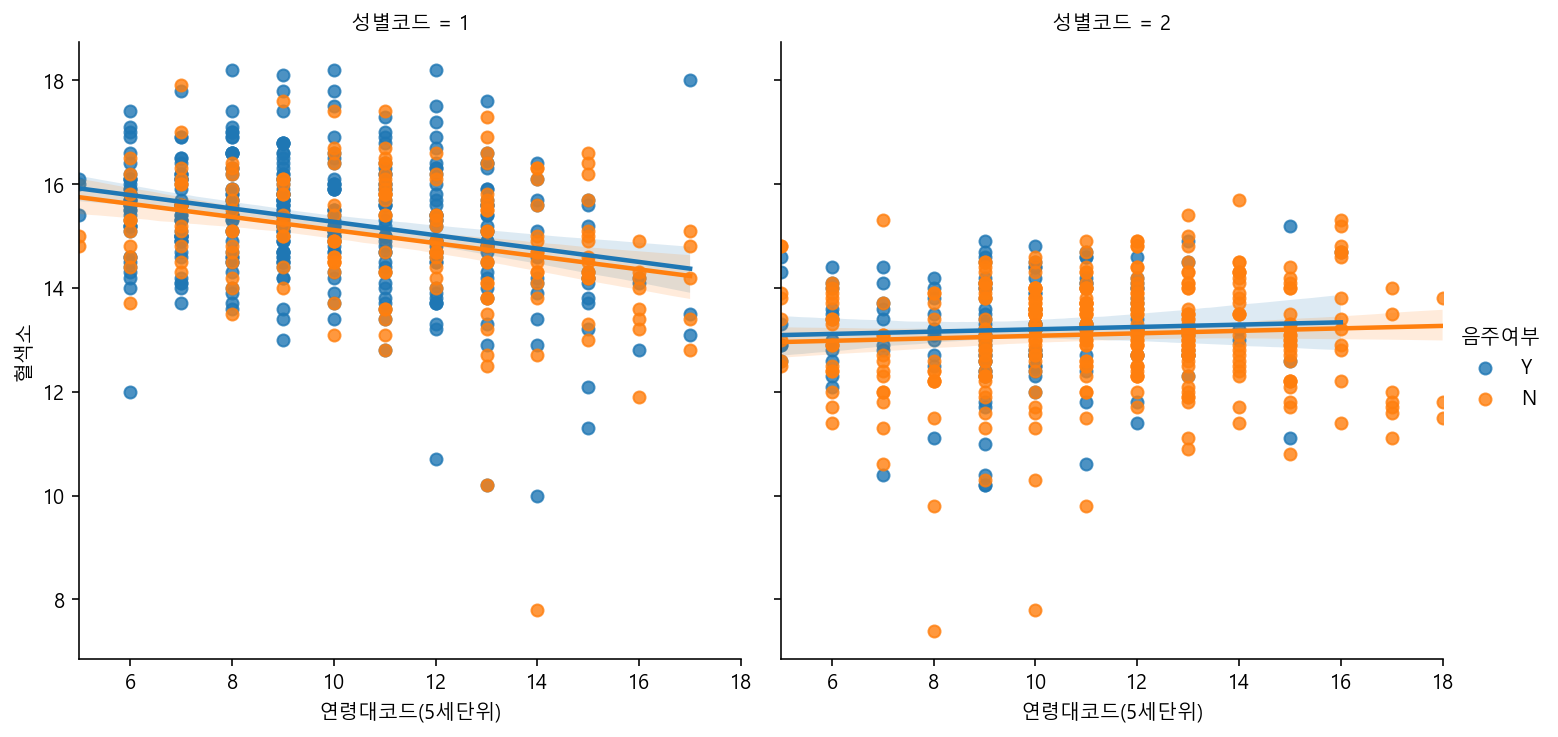

In [56]:
#lmplot으로 그리기, x,y축의 상관관계 알아볼 수 있음, 다변수 시각화 가능
sns.lmplot(data=df_sample,x="연령대코드(5세단위)", y="혈색소",hue="음주여부", col="성별코드")

## 15. 수치형 데이터 시각화
### 15.1 scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관관계를 볼 때 주로 사용
* 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있음

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

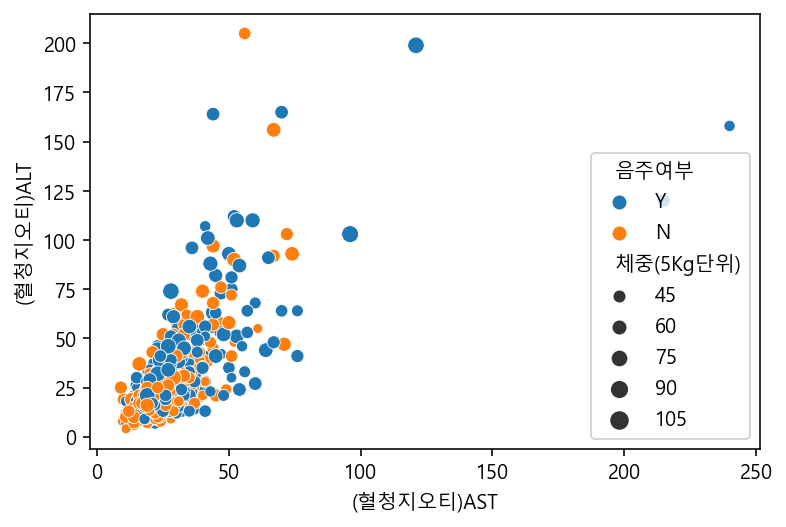

In [57]:
# AST, ALT를 그리고 음주여부에 따라 다른 색상으로 표현 = > 이상치 파악에 유용함
#scatterplot은 x, y가 모두 수치형 데이터일 때 그릴 수 있습니다.
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg단위)")

### 15.2 lmplot - 상관관계를 보기

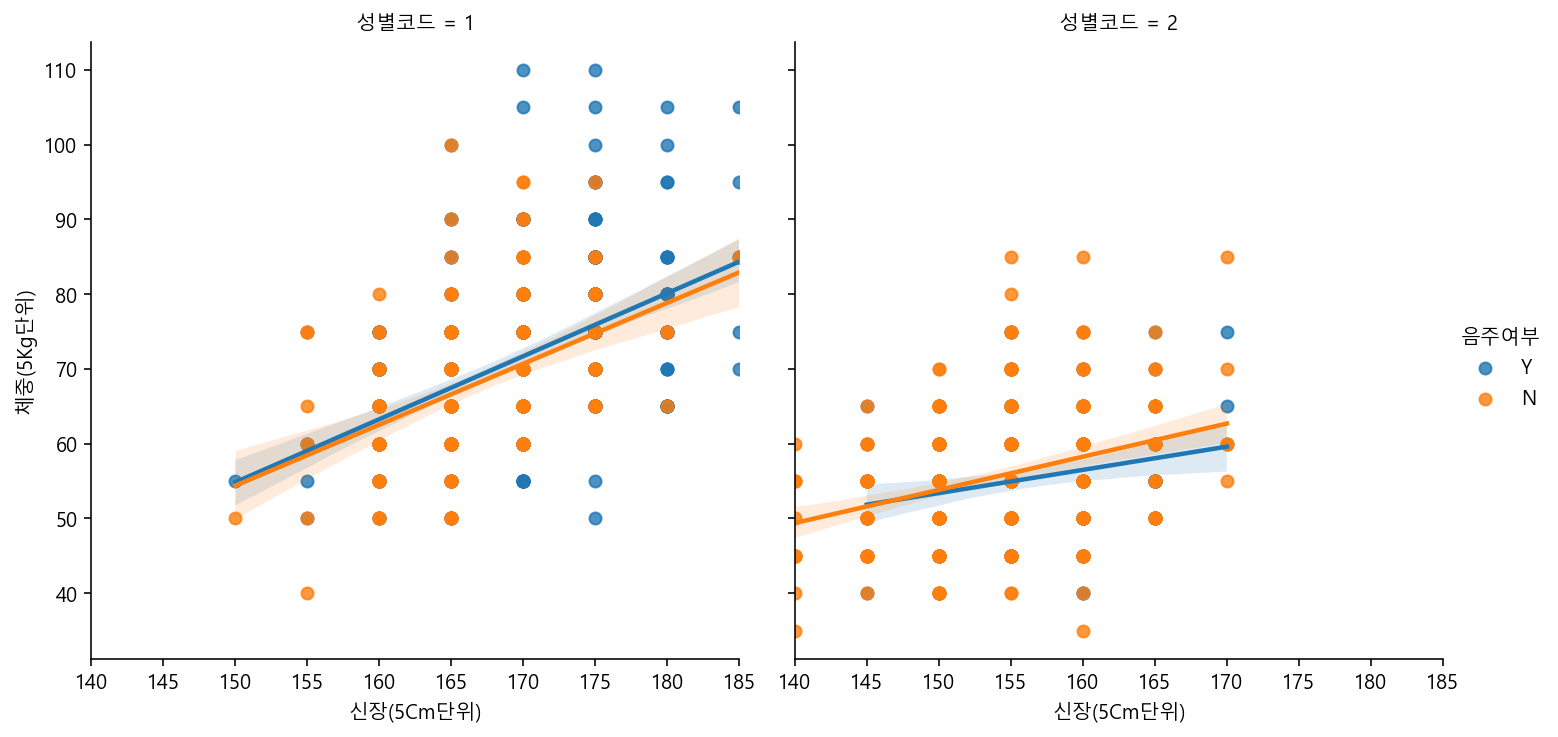

In [58]:
#lmplot으로 그리기
sns.lmplot(data=df_sample,x="신장(5Cm단위)", y="체중(5Kg단위)",hue="음주여부",col="성별코드")

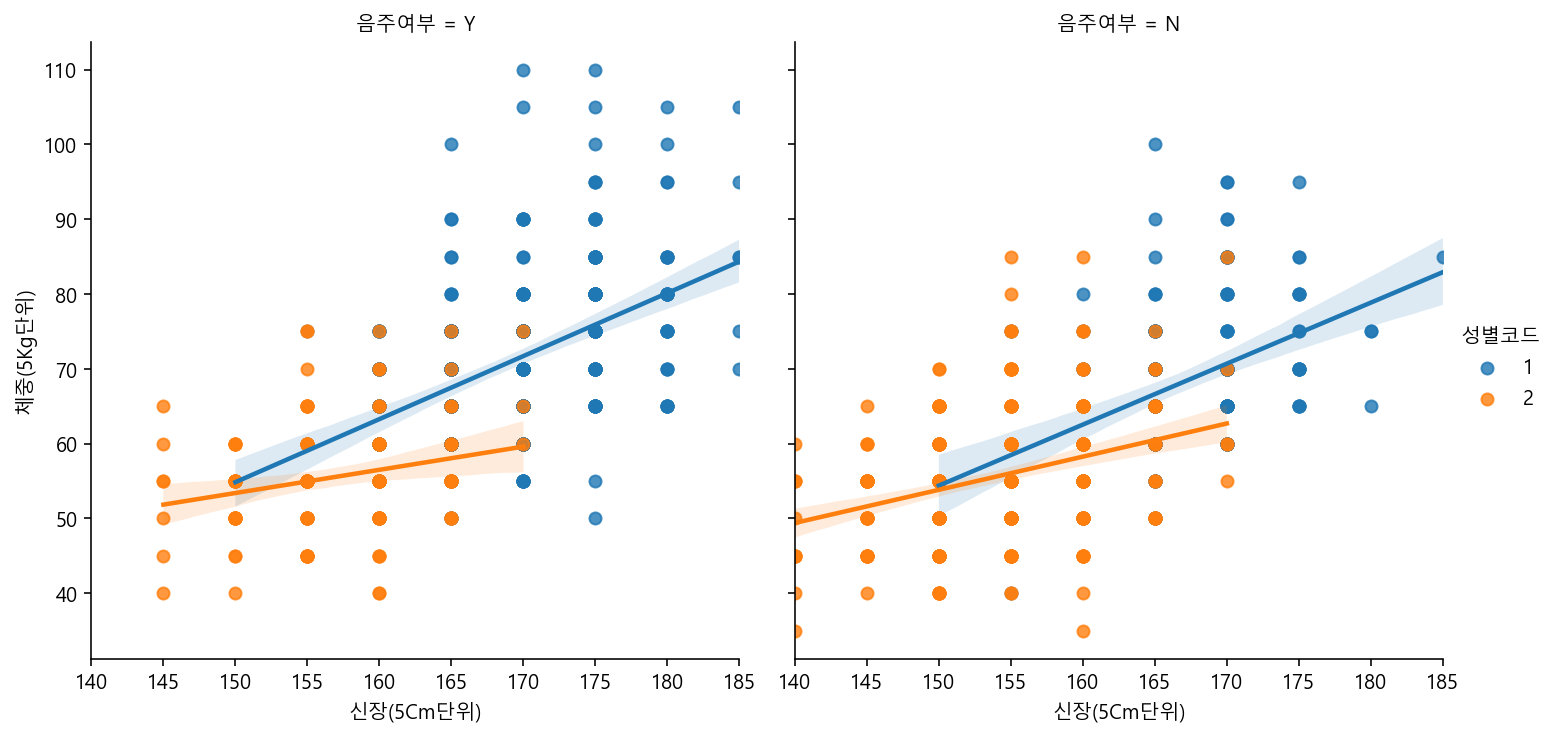

In [59]:
#lmplot col 기능 사용. 음주여부에 따른 서브플롯 그리기
sns.lmplot(data=df_sample,x="신장(5Cm단위)", y="체중(5Kg단위)",hue="성별코드",col="음주여부")

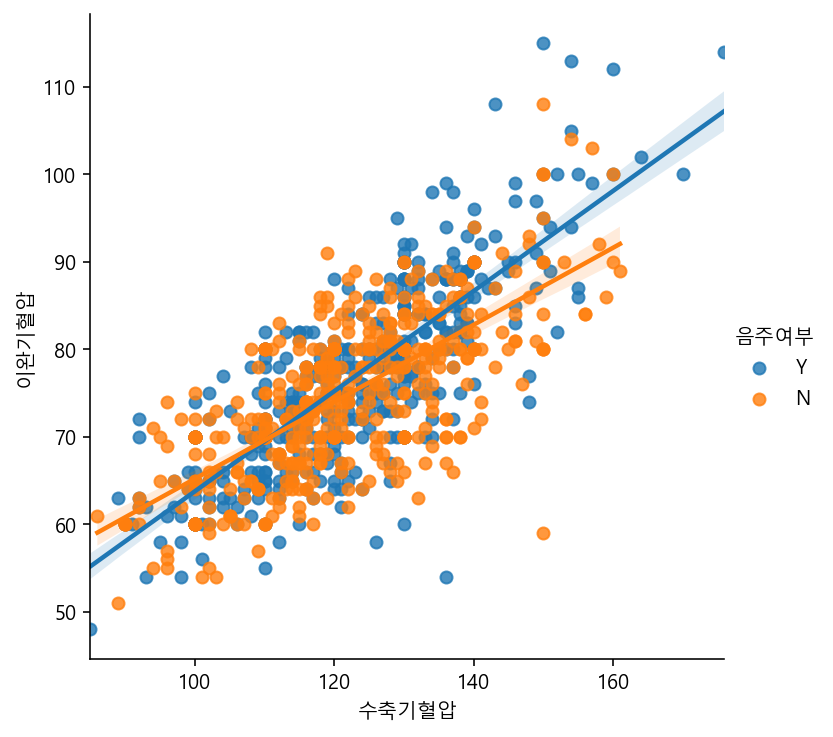

In [60]:
#lmplot으로 수축기, 이완기혈압을 그리고, 음주여부에따른 다른색상 표현
sns.lmplot(data=df_sample,x="수축기혈압", y="이완기혈압",hue="음주여부")

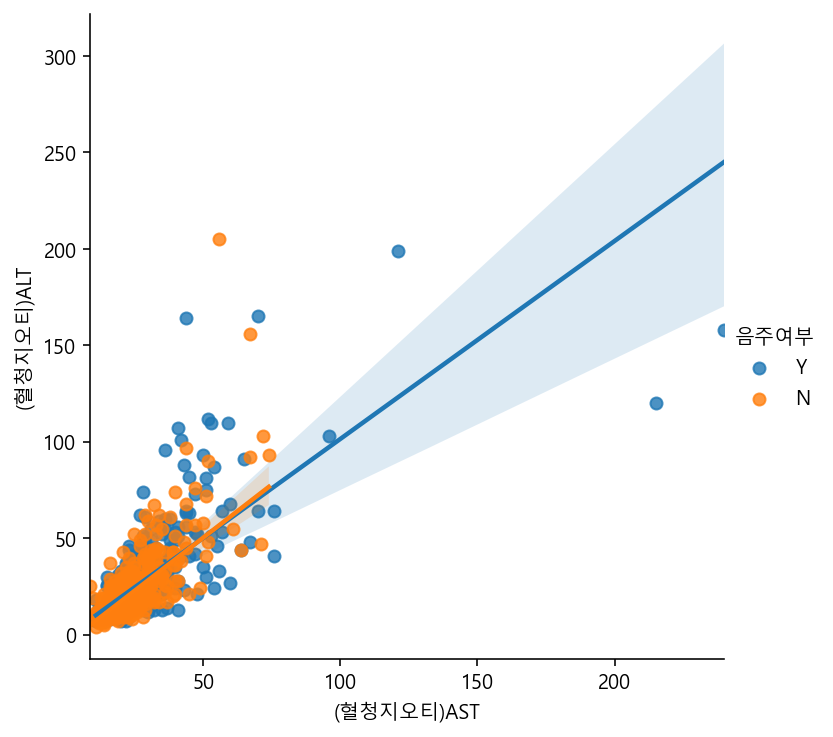

In [61]:
#lmplot으로 AST, ALT를 그리고, 음주여부에따른 다른색상 표현, 이상치 빼고 그릴수있음
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부",robust=True)

### 15.3 이상치 다루기
* 이상치가 있으면 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 함
* 시각화를 통해 찾은 이상치를 제거하고 보거나, 이상치만 따로 모아보기

In [62]:
# AST와 ALT가 400이하인 값만 데이터 프레임 형태로 추출
ds_ASLT = df_sample[(df_sample["(혈청지오티)AST"]< 400) & ((df_sample["(혈청지오티)ALT"]< 400))]

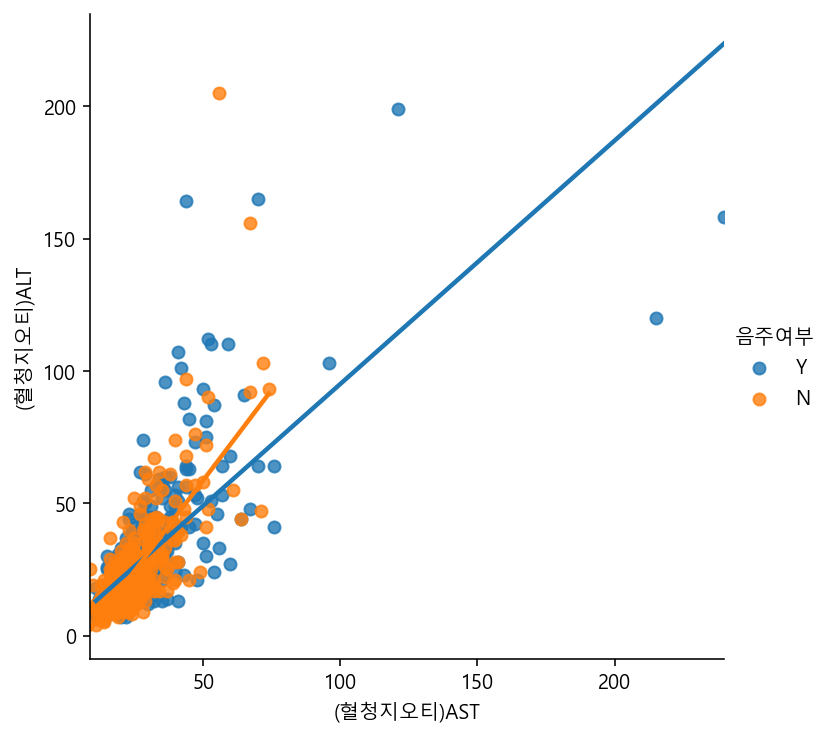

In [63]:
#이상치 제거 후 lmplot그리기
sns.lmplot(data =ds_ASLT, x="(혈청지오티)AST",y="(혈청지오티)ALT",hue="음주여부",ci=None )

In [64]:
#400이상인 값만 추출
df_ASLT_high = df[(df["(혈청지오티)AST"]> 400) | ((df["(혈청지오티)ALT"]> 400))]
df_ASLT_high

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
4754,2017,4755,1,9,41,170,55,74.0,1.0,0.7,...,125.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
15820,2017,15821,2,13,45,150,55,83.0,0.6,1.2,...,999.0,1.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
17830,2017,17831,2,8,41,150,50,64.6,1.2,1.2,...,111.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
19949,2017,19950,1,6,41,170,105,103.0,1.0,1.2,...,133.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
26464,2017,26465,1,7,41,175,70,82.0,1.2,1.2,...,169.0,1.0,N,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982305,2017,982306,2,16,28,155,50,79.3,0.4,0.7,...,71.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
990867,2017,990868,2,11,41,145,45,75.0,0.9,1.2,...,279.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
991226,2017,991227,1,6,42,170,80,81.0,0.7,0.8,...,49.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
992747,2017,992748,2,10,41,165,40,58.0,0.9,0.7,...,777.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


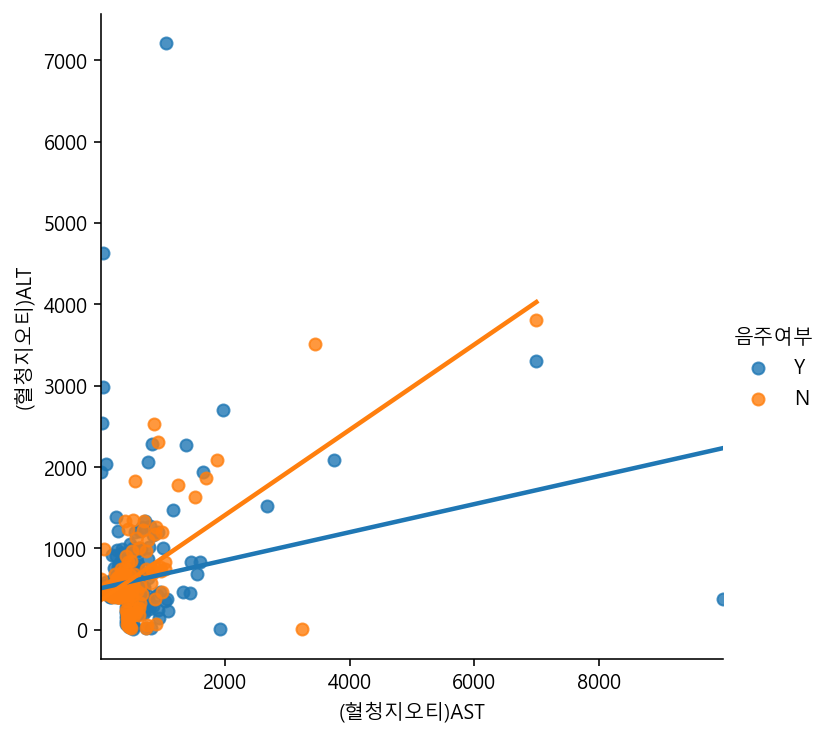

In [65]:
#lmplot 사용
sns.lmplot(data =df_ASLT_high, x="(혈청지오티)AST",y="(혈청지오티)ALT",hue="음주여부",ci=None )

In [66]:
# 8000이상인 값 보기
df_ASLT_high_8000=df_ASLT_high[df_ASLT_high["(혈청지오티)AST"]>8000]
df_ASLT_high_8000.iloc[:,10:27]

,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
541757,1.0,1.0,96.0,74.0,93.0,161.0,67.0,78.0,69.0,15.4,1.0,1.2,9999.0,380.0,419.0,3.0,Y


### 15.4 distplot
* 히스토그램, 도수분포표
* 확률 밀도 함수

In [67]:
#수치형 데이터로 된 컬럼을 찾기위해 컬럼명만 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [68]:
# "총콜레스테롤"에 따른 distplot 그리기
# 결측치가 존재하면 가져오지 못함

df_chol = df.loc[df["총콜레스테롤"].notnull(),"총콜레스테롤"]

C:\Users\c\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

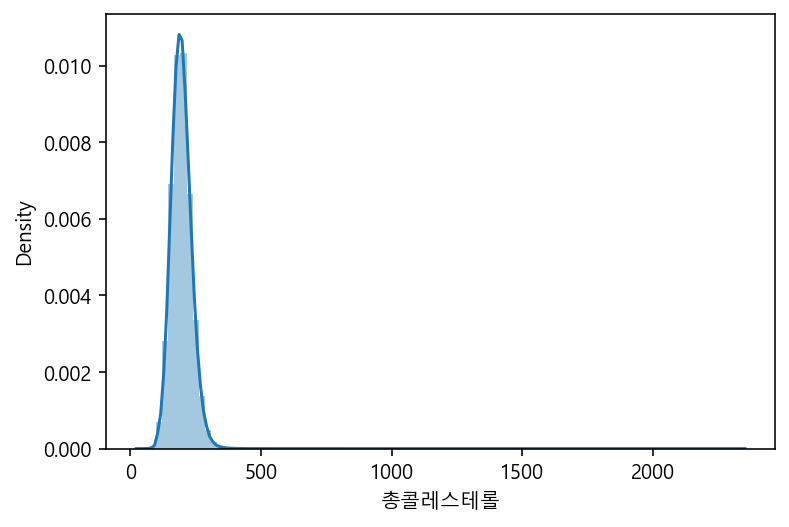

In [69]:
sns.distplot(df_chol, bins=100)

<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

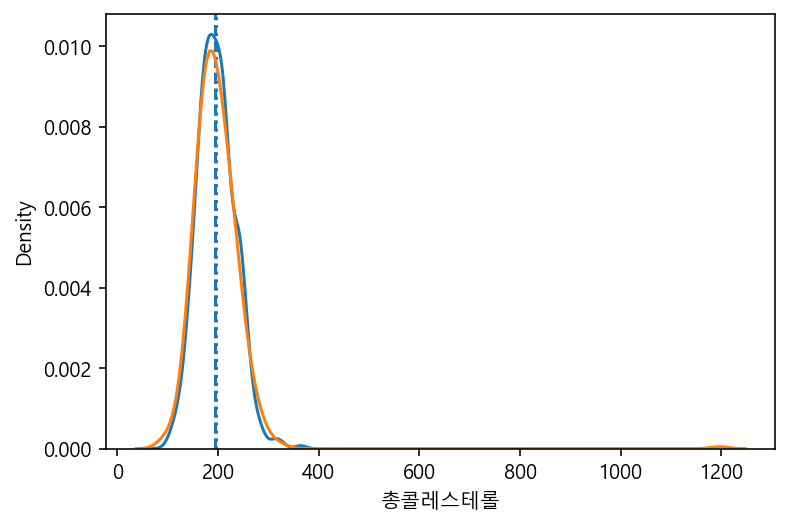

In [70]:
# 음주여부가 1인 값에 대한 "총콜레스테롤"을 distplot으로 그리기, 왜 출력이 안되지? 됐음.
#kdeplot => 히스토그램없이 곡선만 그리기
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[(df_sample["총콜레스테롤"].notnull()) & (df["음주여부"] == "Y"), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[(df_sample["총콜레스테롤"].notnull()) & (df["음주여부"] == "N"), "총콜레스테롤"], label="음주 안 함")

<AxesSubplot:xlabel='감마지티피', ylabel='Density'>

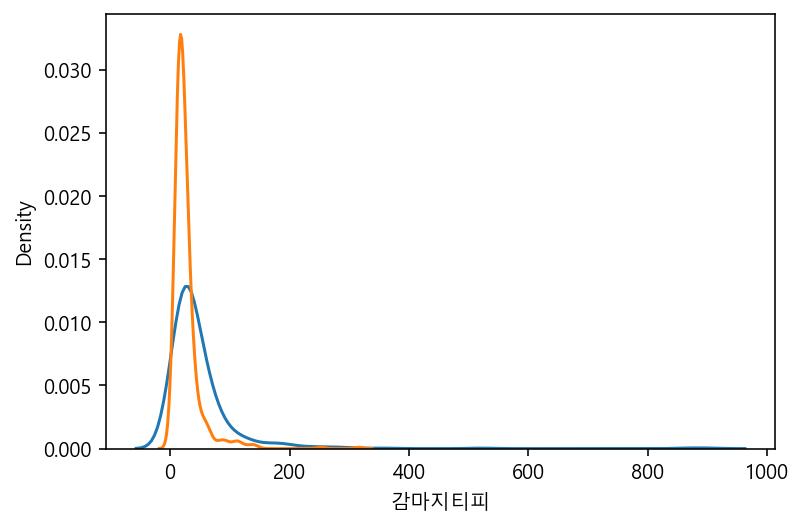

In [71]:
# 감마지티피 값에따라 음주여부 시각화
s_1= df_sample.loc[df_sample["음주여부"]=="Y","감마지티피"]
s_2= df_sample.loc[df_sample["음주여부"]=="N","감마지티피"]

sns.kdeplot(s_1, label="음주중")
sns.kdeplot(s_2, label="음주 안 함")


## 16. 상관분석
* 상관분석
* 상관계수는 변수들 간의 관계를 알아볼 때 유용한 개념입니다. 특정 데이터에 대한 상관관계를 볼 수 있습니다. 상관계수는 -1부터 1사이로 구성되고, 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있습니다.

In [72]:
columns = [ '연령대코드(5세단위)','체중(5Kg단위)','신장(5Cm단위)',
        '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
        '수축기혈압','이완기혈압', '식전혈당(공복혈당)', 
        '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤','혈색소', '요단백', 
        '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태','음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

### 16.1 상관계수 구하기

In [73]:
#샘플링만 가져와서 데이터프레임에 담고 상관계수 구하기
#자기 자신은 상관관계값 1
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

,연령대코드(5세단위),체중(5Kg단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태
연령대코드(5세단위),1.000000,-0.200336,-0.380239,0.159797,-0.217613,-0.308829,0.233960,0.264549,0.222408,0.091006,...,0.037474,-0.095972,0.008560,-0.178977,0.058702,0.044958,0.129357,-0.009871,-0.015357,-0.121132
체중(5Kg단위),-0.200336,1.000000,0.665067,0.785950,0.122194,0.168929,-0.043727,-0.047717,0.288983,0.324783,...,0.260689,-0.330577,0.043839,0.540191,0.012154,0.170468,0.193976,0.401756,0.246924,0.392874
신장(5Cm단위),-0.380239,0.665067,1.000000,0.312230,0.202426,0.236260,-0.064044,-0.074738,0.063929,0.157810,...,0.135087,-0.207537,0.008146,0.541155,-0.007699,0.212811,0.055783,0.159199,0.185091,0.512294
허리둘레,0.159797,0.785950,0.312230,1.000000,0.017355,0.030809,0.050644,0.073086,0.349219,0.329256,...,0.267643,-0.311478,0.017287,0.377673,0.045948,0.131421,0.253549,0.407063,0.234831,0.246296
시력(좌),-0.217613,0.122194,0.202426,0.017355,1.000000,0.346265,-0.039499,-0.081000,-0.012888,0.027854,...,0.032493,-0.045579,-0.052768,0.142582,-0.024741,0.022175,0.011212,0.080793,0.111903,0.141441
시력(우),-0.308829,0.168929,0.236260,0.030809,0.346265,1.000000,-0.072118,-0.102880,-0.036395,0.001282,...,0.070753,-0.068572,0.003336,0.190303,-0.024977,0.080797,0.003236,0.123455,0.035304,0.089486
청력(좌),0.233960,-0.043727,-0.064044,0.050644,-0.039499,-0.072118,1.000000,0.565295,0.039115,-0.015526,...,0.018695,-0.047898,0.006018,-0.000433,0.041231,0.016792,0.020671,0.044048,-0.025004,0.007413
청력(우),0.264549,-0.047717,-0.074738,0.073086,-0.081000,-0.102880,0.565295,1.000000,0.056661,-0.005658,...,0.034650,-0.069527,-0.032362,-0.050208,0.081749,0.017758,-0.004681,-0.019893,-0.024936,-0.042159
수축기혈압,0.222408,0.288983,0.063929,0.349219,-0.012888,-0.036395,0.039115,0.056661,1.000000,0.751731,...,0.233447,-0.093036,-0.007070,0.169241,0.043110,0.034018,0.133472,0.163762,0.191333,0.094145
이완기혈압,0.091006,0.324783,0.157810,0.329256,0.027854,0.001282,-0.015526,-0.005658,0.751731,1.000000,...,0.225436,-0.091701,0.038887,0.255690,0.035826,0.081965,0.131482,0.191155,0.200150,0.144974


In [74]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터 보기
df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.380239
HDL콜레스테롤      -0.207537
청력(우)         -0.074738
청력(좌)         -0.064044
요단백           -0.007699
총콜레스테롤        -0.004133
식전혈당(공복혈당)     0.005997
LDL콜레스테롤       0.008146
(혈청지오티)AST     0.055783
수축기혈압          0.063929
트리글리세라이드       0.135087
이완기혈압          0.157810
(혈청지오티)ALT     0.159199
감마지티피          0.185091
시력(좌)          0.202426
혈청크레아티닌        0.212811
시력(우)          0.236260
허리둘레           0.312230
흡연상태           0.512294
혈색소            0.541155
체중(5Kg단위)      0.665067
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [75]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

체중(5Kg단위)    0.665067
신장(5Cm단위)    1.000000
허리둘레         0.312230
혈색소          0.541155
흡연상태         0.512294
Name: 신장(5Cm단위), dtype: float64

In [76]:
#음주 여부에 대한 상관계수가 특정수치 이상인 데이터보기, 왜 안봐질까? 없음. 왜...
df_corr.loc[df_corr["음주여부"] > 0.1, "음주여부"]

KeyError: '음주여부'

In [77]:
df_corr["음주여부"].sort_values()

KeyError: '음주여부'

In [78]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터 보기
df_corr["혈색소"].sort_values(ascending=False).head(7)


혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
이완기혈압         0.255690
Name: 혈색소, dtype: float64

In [79]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터 보기
df_corr["감마지티피"].sort_values(ascending=False).head(7)


감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

### 16.2 heatmap

<AxesSubplot:>

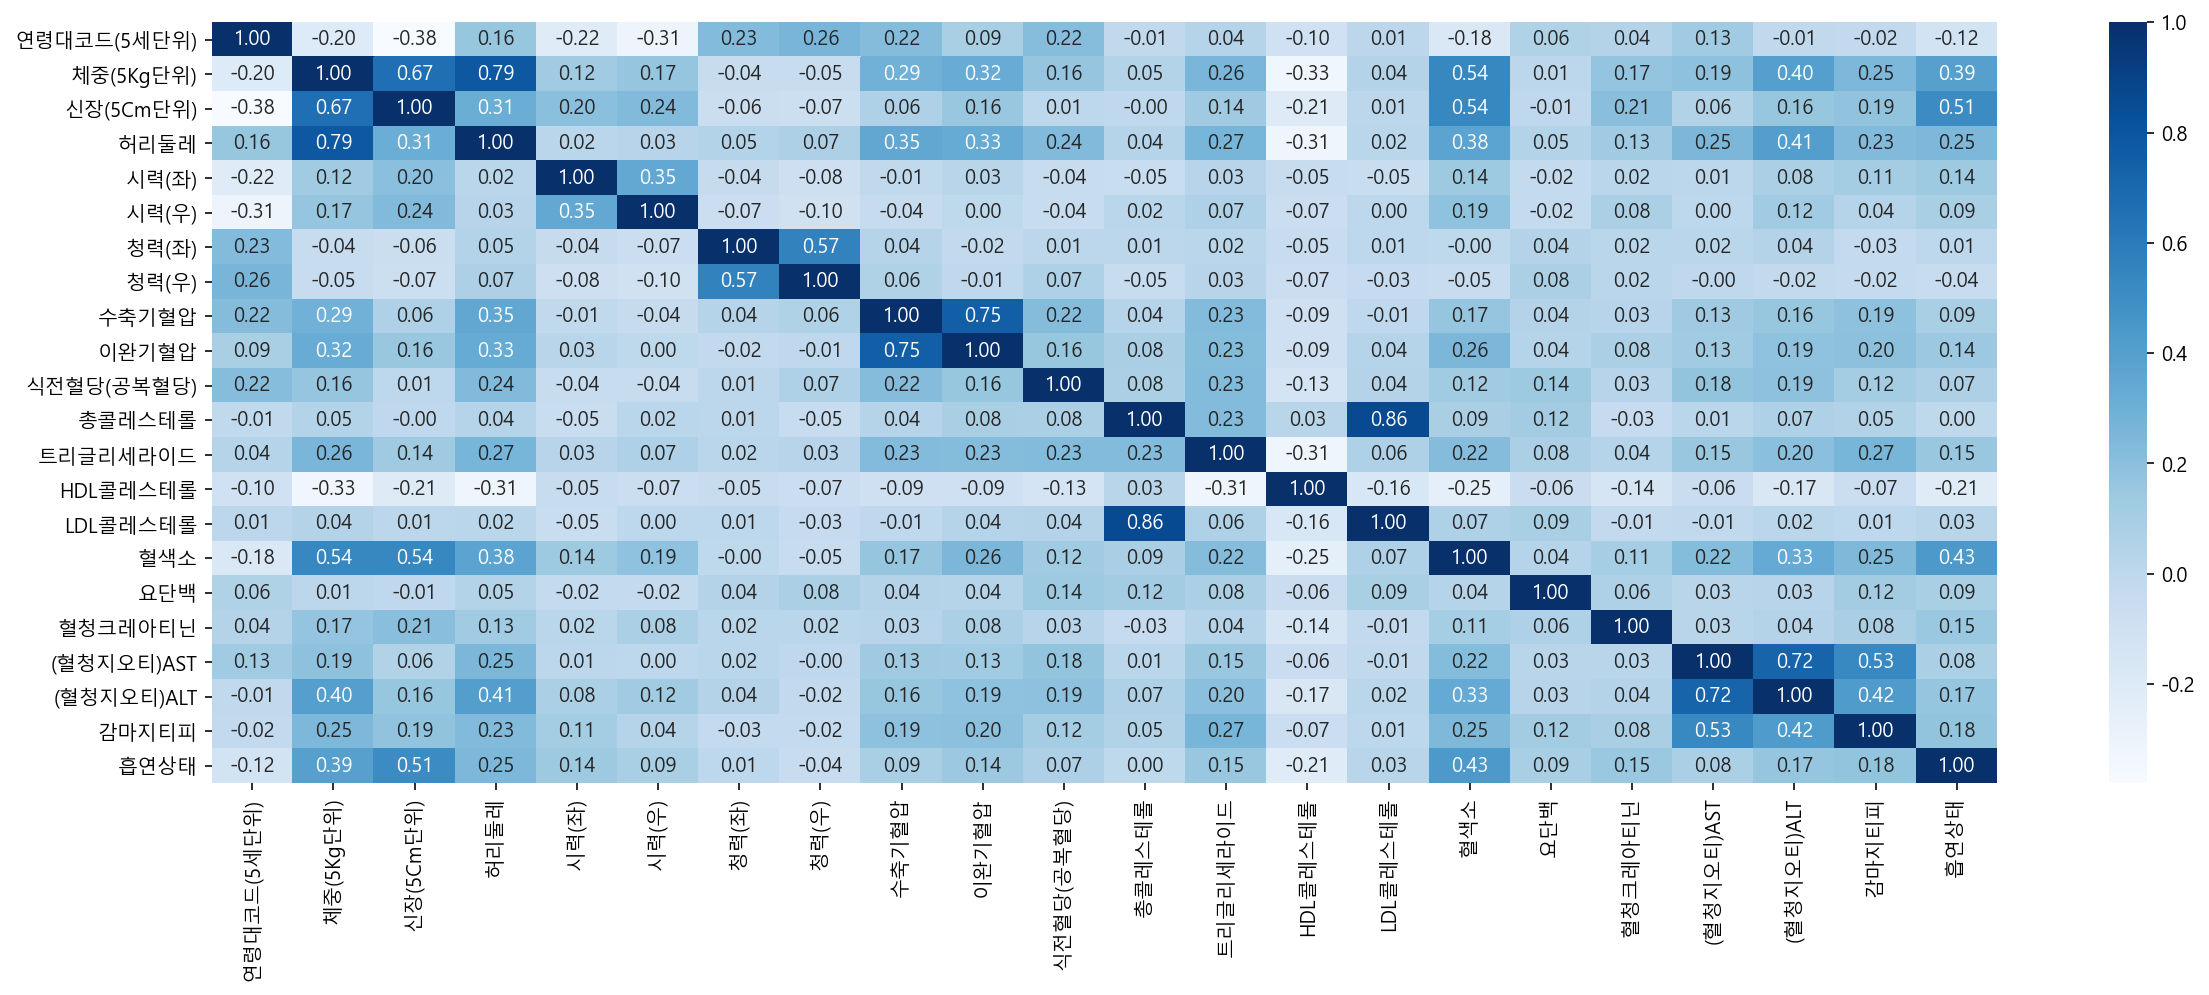

In [83]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f",cmap="Blues")

### 신장과 체중은 강한 상관관계가 있다.
### 허리랑 키와 체중은 상관관계 있음

<AxesSubplot:>

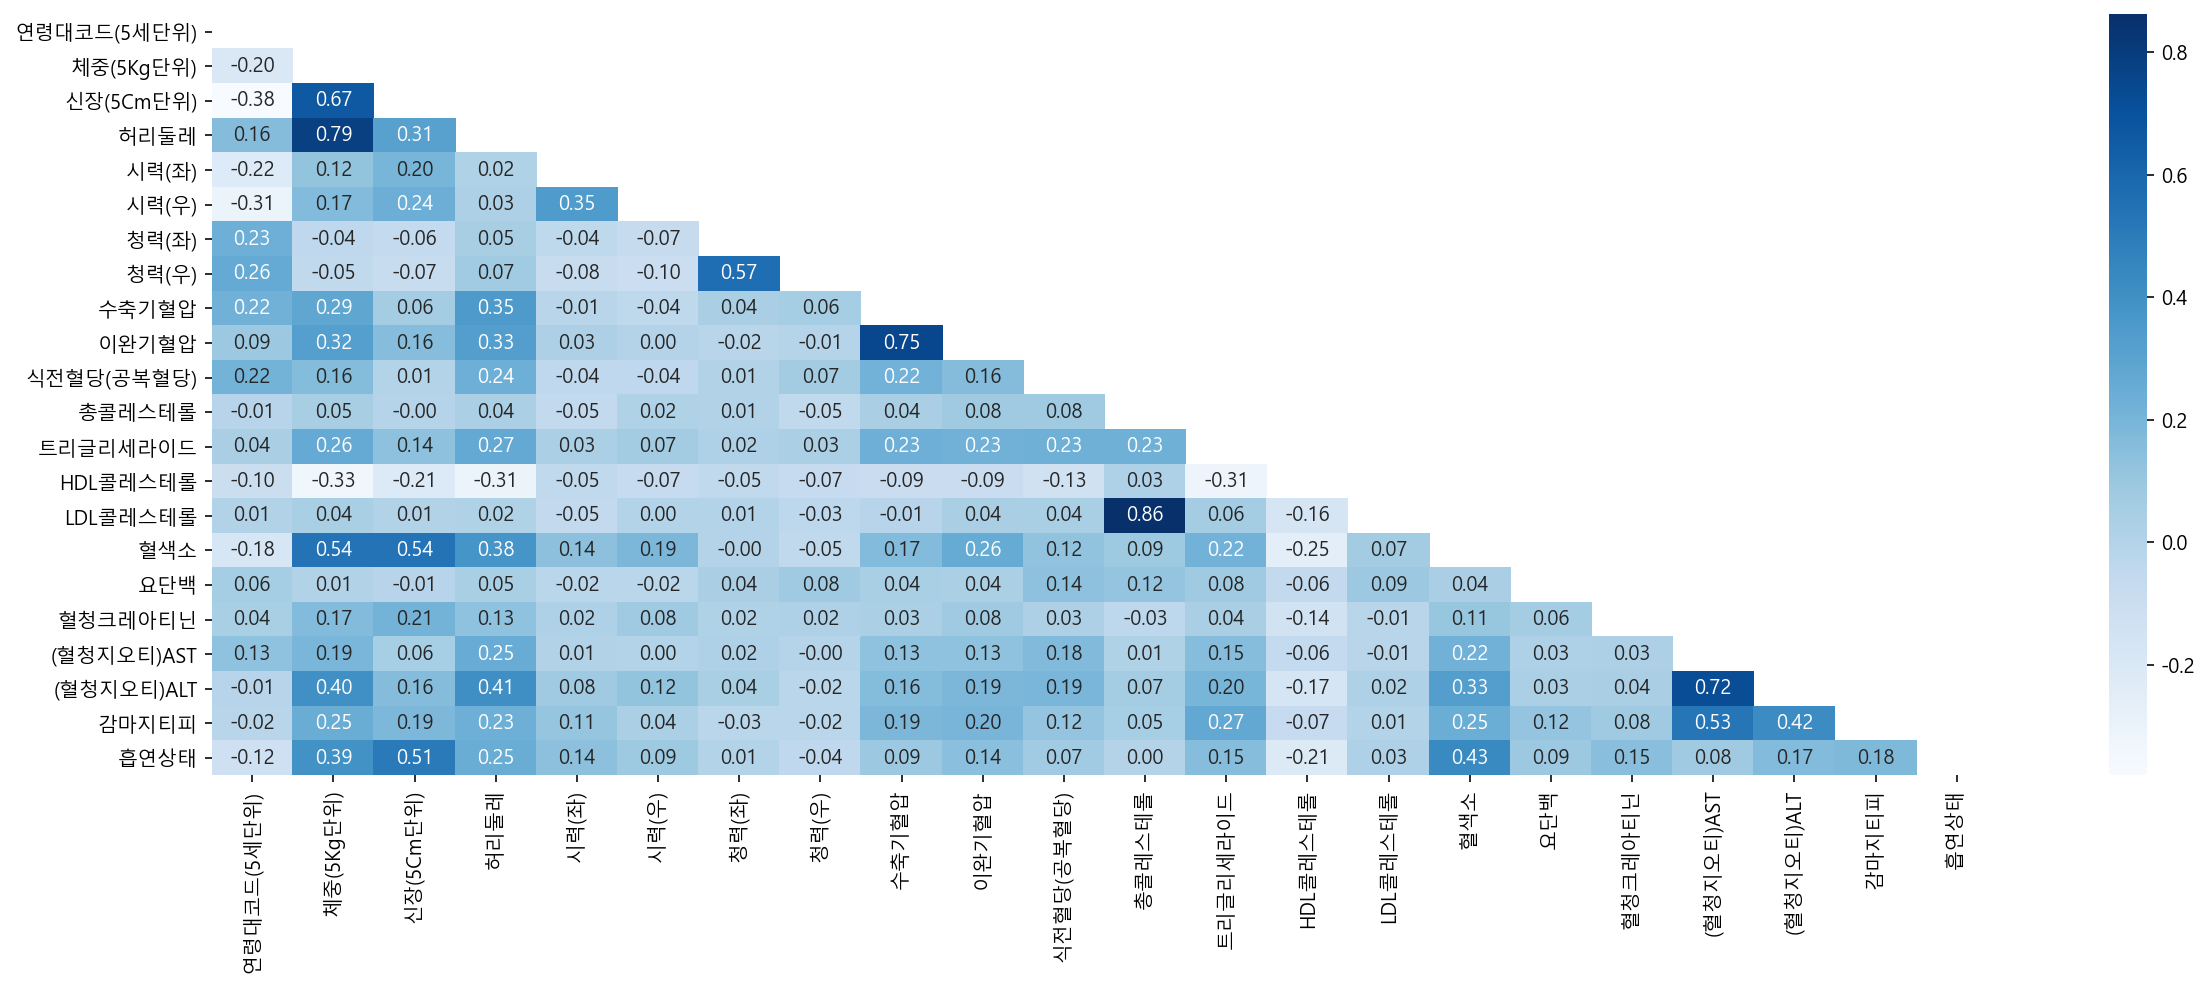

In [86]:
#대각선 아래의 값만 표시하도록 설정 
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f",cmap="Blues",mask=mask)